# Chapter 1: Sensor Fusion and ML

# Data Cleaning

In [1]:
#Importing requried libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import os

print("--Libraries Version--")
print("Numpy Verion:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Matplotlib Version:", matplotlib.__version__)
print("Seaborn Version:", sns.__version__)

--Libraries Version--
Numpy Verion: 1.26.3
Pandas Version: 2.0.3
Matplotlib Version: 3.7.2
Seaborn Version: 0.12.2


### VCSEL Dataset

Model Used: VL53L0X

In [2]:
cwd = os.getcwd()
df_vcsel = pd.read_excel(os.path.join(cwd, 'Cleaned Data Final.xlsx'), sheet_name='VCSEL', index_col=[0], header=[1,2,3,4,5])
df_vcsel.columns.names=["Time of Day", "Size", "Color", "Barrier", "Measurements"]
display(df_vcsel.head(15))

Time of Day             Day                                      \
Size                  Small                                       
Color                 Black                                       
Barrier              No Bar                                       
Measurements Distance (cm): Lux (lux): Temp (°C): Humidity (%):   
M1.1                   18.5      90.00       33.0          80.1   
M1.2                   19.3      90.00       33.0          80.3   
M1.3                   17.9      90.00       33.0          80.3   
M1.4                   18.0      90.00       33.0          80.0   
M1.5                   19.4      90.00       33.0          80.0   
M2.1                   18.1      95.83       32.8          78.9   
M2.2                   18.0      95.83       32.8          78.9   
M2.3                   17.6      95.83       32.8          78.9   
M2.4                   17.9      95.83       32.8          78.9   
M2.5                   18.4      95.83       32.8          78.9   
M3.1                    NaN        NaN        NaN           NaN   
M3.2                    NaN        NaN        NaN           NaN   
M3.3                    NaN        NaN        NaN           NaN   
M3.4                    NaN        NaN        NaN           NaN   
M3.5                    NaN        NaN        NaN           NaN   

Time of Day                                                      \
Size                                                              
Color                                                             
Barrier            With Bar                                       
Measurements Distance (cm): Lux (lux): Temp (°C): Humidity (%):   
M1.1                   10.2      90.83       33.0          79.1   
M1.2                    9.3      90.00       33.0          79.5   
M1.3                   10.3      90.00       33.0          79.5   
M1.4                    9.0      90.00       33.0          79.3   
M1.5                    9.7      90.00       33.0          79.3   
M2.1                    8.7      88.33       32.8          78.3   
M2.2                    8.0      88.33       32.8          78.3   
M2.3                    9.0      87.50       32.8          78.3   
M2.4                    9.7      87.50       32.8          78.3   
M2.5                    9.4      87.50       32.8          78.3   
M3.1                    NaN        NaN        NaN           NaN   
M3.2                    NaN        NaN        NaN           NaN   
M3.3                    NaN        NaN        NaN           NaN   
M3.4                    NaN        NaN        NaN           NaN   
M3.5                    NaN        NaN        NaN           NaN   

Time of Day                             ...         Night                 \
Size                                    ...           Big                  
Color                 White             ...         Black          White   
Barrier              No Bar             ...      With Bar         No Bar   
Measurements Distance (cm): Lux (lux):  ... Humidity (%): Distance (cm):   
M1.1                   20.5      89.17  ...          88.1           28.4   
M1.2                   21.3      89.17  ...          88.1           28.4   
M1.3                   20.5      90.00  ...          88.1           28.4   
M1.4                   20.5      90.00  ...          88.1           28.4   
M1.5                   20.9      90.00  ...          88.1           28.4   
M2.1                   18.5      93.33  ...          87.1           54.1   
M2.2                   18.0      93.33  ...          87.1           54.7   
M2.3                   19.1      93.33  ...          87.1           53.9   
M2.4                   19.4      92.50  ...          87.3           54.3   
M2.5                   18.4      92.50  ...          87.3           53.9   
M3.1                    NaN        NaN  ...          99.9           33.6   
M3.2                    NaN        NaN  ...          99.9           34.0   
M3.3                    Na

In [3]:
print("Nulls in the VCSEL table")
display(df_vcsel.isnull().sum())
print(f"Total cells with null values: {df_vcsel.isnull().sum().sum()}")

Nulls in the VCSEL table


Time of Day               Size                 Color                Barrier              Measurements       
Day                       Small                Black                No Bar               Distance (cm):         40
                                                                                         Lux (lux):             40
                                                                                         Temp (°C):             40
                                                                                         Humidity (%):          40
                                                                    With Bar             Distance (cm):         40
                                                                                                                ..
Night                     Big                  White                With Bar             Distance (cm):         30
                                                                                      

Total cells with null values: 2240


The cells with _null values_ exist when the sensor doesn't read/detect the object anymore thus the 
<b>default value</b> to be imputed on these cells will be based on the previous reading where the sensor begin to have the fail readings.

In [4]:
for col in df_vcsel.columns:
    for i in range(len(df_vcsel)):
        #broadcast the values of the previous 5 non-null cells in each column to the next 5 cells with null values
        if pd.isna(df_vcsel.loc[df_vcsel.index[i], col]):
            df_vcsel.loc[df_vcsel.index[i]:df_vcsel.index[i+4],col] = df_vcsel.loc[df_vcsel.index[i-5]:df_vcsel.index[i-1],col].values

In [5]:
#Sanity check if changes where pushed on the dataframe
df_vcsel.tail(15).style.set_properties(**{'background-color': '#79c0ff'}, subset=[c for c in df_vcsel.columns if 'No Bar' in c[3]])

### Ultrasonic Dataset

Model Used: HC-SR04

In [6]:
df_ultrasonic = pd.read_excel(os.path.join(cwd, 'Cleaned Data Final.xlsx'), sheet_name='Ultrasonic', index_col=[0], header=[1,2,3,4,5])
df_ultrasonic.columns.names= ["Time of Day", "Size", "Color", "Barrier", "Measurements"]
display(df_ultrasonic.head(15))

Time of Day             Day                                      \
Size                  Small                                       
Color                 Black                                       
Barrier              No Bar                                       
Measurements Distance (cm): Lux (lux): Temp (°C): Humidity (%):   
M1.1                  26.54    1923.33       34.7          64.1   
M1.2                  26.44    1921.67       34.7          64.1   
M1.3                  26.54    1922.50       34.7          64.1   
M1.4                  26.44    1922.50       34.7          64.1   
M1.5                  26.55    1913.33       34.7          64.1   
M2.1                  50.58    1624.17       34.8          63.6   
M2.2                  50.05    1625.00       34.8          63.6   
M2.3                  50.47    1625.83       34.8          63.5   
M2.4                  50.05    1625.83       34.8          63.5   
M2.5                  50.00    1628.33       34.8          63.5   
M3.1                  76.64    1577.50       34.9          65.3   
M3.2                  75.73    1576.67       34.8          65.3   
M3.3                  76.09    1575.83       34.8          65.3   
M3.4                  75.79    1577.50       34.9          65.4   
M3.5                  75.80    1574.17       34.9          65.4   

Time of Day                                                      \
Size                                                              
Color                                                             
Barrier            With Bar                                       
Measurements Distance (cm): Lux (lux): Temp (°C): Humidity (%):   
M1.1                  10.59    1343.33       34.6          64.3   
M1.2                  10.66    1335.83       34.6          64.3   
M1.3                  10.49    1328.33       34.6          64.3   
M1.4                  10.64    1307.50       34.6          64.1   
M1.5                  10.13    1305.83       34.6          64.1   
M2.1                  10.59    1378.33       34.8          64.1   
M2.2                  10.18    1385.00       34.8          64.1   
M2.3                  10.12    1379.17       34.8          64.1   
M2.4                  10.60    1375.83       34.8          64.1   
M2.5                  10.00    1373.33       34.8          64.1   
M3.1                  10.76    1297.50       34.8          65.6   
M3.2                  10.66    1296.67       34.8          65.6   
M3.3                  10.71    1297.50       34.8          65.6   
M3.4                  10.54    1296.67       34.8          65.6   
M3.5                  10.69    1296.67       34.8          65.6   

Time of Day                             ...         Night                 \
Size                                    ...           Big                  
Color                 White             ...         Black          White   
Barrier              No Bar             ...      With Bar         No Bar   
Measurements Distance (cm): Lux (lux):  ... Humidity (%): Distance (cm):   
M1.1                  26.66    1521.67  ...          99.9          24.19   
M1.2                  26.61    1596.67  ...          99.9          25.16   
M1.3                  26.61    1644.17  ...          99.9          24.75   
M1.4                  26.71    1633.33  ...          99.9          24.75   
M1.5                  26.95     488.33  ...          99.9          24.22   
M2.1                  50.12    1630.83  ...          99.9          49.49   
M2.2                  51.41    1630.00  ...          99.9          49.47   
M2.3                  50.95    1631.67  ...          99.9          49.06   
M2.4                  49.66    1625.00  ...          99.9          49.59   
M2.5                  51.36    1629.17  ...          99.9          49.47   
M3.1                  74.29    1388.33  ...          99.9          73.25   
M3.2                  75.07    1382.50  ...          99.9          74.78   
M3.3                  75.4

In [7]:
print("Nulls in the Ultrasonic table")
display(df_ultrasonic.isnull().sum())
print(f"Total cells with null values: {df_ultrasonic.isnull().sum().sum()}")

Nulls in the Ultrasonic table


Time of Day               Size                 Color                Barrier              Measurements       
Day                       Small                Black                No Bar               Distance (cm):         15
                                                                                         Lux (lux):             15
                                                                                         Temp (°C):             15
                                                                                         Humidity (%):          15
                                                                    With Bar             Distance (cm):         15
                                                                                                                ..
Night                     Big                  White                With Bar             Distance (cm):          5
                                                                                      

Total cells with null values: 560


The cells with _null values_ exist when the sensor doesn't read/detect the object anymore thus the 
<b>default value</b> to be imputed on these cells will be based on the previous reading where the sensor begin to have the fail readings.

In [8]:
for col in df_ultrasonic.columns:
    for i in range(len(df_ultrasonic)):
        #broadcast the values of the previous 5 non-null cells in each column to the next 5 cells with null values
        if pd.isna(df_ultrasonic.loc[df_ultrasonic.index[i], col]):
            df_ultrasonic.loc[df_ultrasonic.index[i]:df_vcsel.index[i+4],col] = df_ultrasonic.loc[df_ultrasonic.index[i-5]:df_ultrasonic.index[i-1],col].values

In [9]:
#Sanity check if changes where pushed on the dataframe
df_ultrasonic.tail(15).style.set_properties(**{'background-color': '#79c0ff'}, subset=[c for c in df_ultrasonic.columns if 'No Bar' in c[3]])

### Infrared Dataset

Model Used: GP2Y0A710K0F

In [10]:
df_infrared = pd.read_excel(os.path.join(cwd, 'Cleaned Data Final.xlsx'), sheet_name='Infrared', index_col=[0], header=[1,2,3,4,5])
df_infrared.columns.names= ["Time of Day", "Size", "Color", "Barrier", "Measurements"]
display(df_infrared.head(15))

Time of Day             Day                                      \
Size                  Small                                       
Color                 Black                                       
Barrier              No Bar                                       
Measurements Distance (cm): Lux (lux): Temp (°C): Humidity (%):   
M1.1                 829.40      35.00       32.4          67.9   
M1.2                 788.30      35.00       32.6          68.2   
M1.3                 684.22      35.00       32.6          68.2   
M1.4                 778.97      35.00       32.3          67.7   
M1.5                 941.07      35.83       32.3          67.7   
M2.1                 738.20      37.50       32.3          69.2   
M2.2                 516.86      37.00       32.3          69.2   
M2.3                 957.88      37.50       32.3          69.2   
M2.4                 847.68      35.00       32.2          69.1   
M2.5                 847.10      35.83       32.2          69.1   
M3.1                 641.71      17.50       31.9          75.5   
M3.2                 598.28      17.50       31.9          75.5   
M3.3                 534.49      17.50       31.9          75.5   
M3.4                 533.75      17.50       31.9          75.5   
M3.5                 585.43      19.17       31.9          75.5   

Time of Day                                                      \
Size                                                              
Color                                                             
Barrier            With Bar                                       
Measurements Distance (cm): Lux (lux): Temp (°C): Humidity (%):   
M1.1                 568.33      34.17       32.4          67.9   
M1.2                 548.80      34.17       32.4          67.9   
M1.3                 508.76      34.17       32.3          67.9   
M1.4                 511.10      34.17       32.3          67.9   
M1.5                 568.21      34.17       32.2          67.8   
M2.1                 471.41      37.50       32.3          69.8   
M2.2                 469.84      37.50       32.3          69.8   
M2.3                 327.33      37.50       32.3          70.0   
M2.4                 284.00      36.67       32.3          70.0   
M2.5                 296.58      36.67       32.2          69.9   
M3.1                 315.38      20.00       31.9          75.5   
M3.2                 336.48      20.83       31.9          75.5   
M3.3                 284.46      20.83       31.9          75.5   
M3.4                 379.81      20.83       31.9          75.5   
M3.5                 351.43      20.00       31.9          75.5   

Time of Day                             ...         Night                 \
Size                                    ...           Big                  
Color                 White             ...         Black          White   
Barrier              No Bar             ...      With Bar         No Bar   
Measurements Distance (cm): Lux (lux):  ... Humidity (%): Distance (cm):   
M1.1                 104.91      34.17  ...          99.9         102.91   
M1.2                 104.60      33.33  ...          99.9          97.25   
M1.3                 104.53      34.17  ...          99.9         103.03   
M1.4                 104.75      35.83  ...          99.9         102.77   
M1.5                 104.85      35.83  ...          99.9         103.02   
M2.1                 899.58      36.67  ...          99.9          67.66   
M2.2                 914.99      36.67  ...          99.9          63.13   
M2.3                 711.56      36.67  ...          99.9          66.71   
M2.4                 723.28      36.67  ...          99.9          67.66   
M2.5                 539.59      36.67  ...          99.9          63.41   
M3.1                 550.48      16.67  ...          99.9          78.15   
M3.2                 665.52      16.67  ...          99.9          76.66   
M3.3                 674.5

In [11]:
print("Nulls in the infrared table")
display(df_infrared.isnull().sum())
print(f"Total cells with null values: {df_infrared.isnull().sum().sum()}")

Nulls in the infrared table


Time of Day               Size                 Color                Barrier              Measurements       
Day                       Small                Black                No Bar               Distance (cm):         30
                                                                                         Lux (lux):             30
                                                                                         Temp (°C):             30
                                                                                         Humidity (%):          30
                                                                    With Bar             Distance (cm):         30
                                                                                                                ..
Night                     Big                  White                With Bar             Distance (cm):          0
                                                                                      

Total cells with null values: 880


In [12]:
for col in df_infrared.columns:
    for i in range(len(df_infrared)):
        #broadcast the values of the previous 5 non-null cells in each column to the next 5 cells with null values
        if pd.isna(df_infrared.loc[df_infrared.index[i], col]):
            df_infrared.loc[df_infrared.index[i]:df_vcsel.index[i+4],col] = df_infrared.loc[df_infrared.index[i-5]:df_infrared.index[i-1],col].values

In [13]:
#Sanity check if changes where pushed on the dataframe
df_infrared.tail(15).style.set_properties(**{'background-color': '#79c0ff'}, subset=[c for c in df_infrared.columns if 'No Bar' in c[3]])

The cells with _null values_ exist when the sensor doesn't read/detect the object anymore thus the 
<b>default value</b> to be imputed on these cells will be based on the previous reading where the sensor begin to have the fail readings.

### LIDAR Dataset

Model Used: RPLIDAR A2M8 360 Degree

In [14]:
df_lidar = pd.read_excel(os.path.join(cwd, 'Cleaned Data Final.xlsx'), sheet_name='LIDAR', index_col=[0], header=[1,2,3,4,5])
df_lidar.columns.names= ["Time of Day", "Size", "Color", "Barrier", "Measurements"]
display(df_lidar.head(15))

Time of Day             Day                                      \
Size                  Small                                       
Color                 Black                                       
Barrier              No Bar                                       
Measurements Distance (cm): Lux (lux): Temp (°C): Humidity (%):   
M1.1                  24.83      80.83       32.5          91.8   
M1.2                  24.94      80.83       32.5          91.8   
M1.3                  24.58      80.83       32.4          92.0   
M1.4                  24.75      80.83       32.4          92.0   
M1.5                  24.67      80.83       32.4          91.8   
M2.1                  50.25      45.00       32.2          94.3   
M2.2                  50.22      44.11       32.2          93.8   
M2.3                  50.15      44.17       32.2          93.8   
M2.4                  50.25      44.17       32.2          93.7   
M2.5                  50.38      44.11       32.2          93.7   
M3.1                  75.14      38.33       32.1          92.2   
M3.2                  75.16      38.33       32.0          92.2   
M3.3                  75.45      39.17       32.0          92.2   
M3.4                  75.17      38.33       33.0          92.1   
M3.5                  75.46      40.00       34.0          92.1   

Time of Day                                                      \
Size                                                              
Color                                                             
Barrier            With Bar                                       
Measurements Distance (cm): Lux (lux): Temp (°C): Humidity (%):   
M1.1                  25.52      80.83       32.5          91.8   
M1.2                  25.52      80.83       32.5          91.8   
M1.3                  24.72      80.83       32.4          92.0   
M1.4                  24.92      80.83       32.4          92.0   
M1.5                  24.92      80.83       32.4          91.8   
M2.1                  49.97      45.00       32.2          94.3   
M2.2                  50.32      44.11       32.2          93.8   
M2.3                  50.16      44.17       32.2          93.8   
M2.4                  50.28      44.17       32.2          93.7   
M2.5                  50.25      44.11       32.2          93.7   
M3.1                  75.36      38.33       32.1          92.2   
M3.2                  75.52      38.33       32.0          92.2   
M3.3                  75.42      39.17       32.0          92.2   
M3.4                  75.47      38.33       33.0          92.1   
M3.5                  75.16      40.00       34.0          92.1   

Time of Day                             ...         Night                 \
Size                                    ...           Big                  
Color                 White             ...         Black          White   
Barrier              No Bar             ...      With Bar         No Bar   
Measurements Distance (cm): Lux (lux):  ... Humidity (%): Distance (cm):   
M1.1                  27.35      80.83  ...         92.70          25.55   
M1.2                  26.45      80.83  ...         94.56          25.55   
M1.3                  25.72      80.83  ...         94.72          25.60   
M1.4                  25.72      80.83  ...         92.65          25.55   
M1.5                  25.50      80.83  ...         92.88          25.12   
M2.1                  50.45      45.00  ...         93.01          50.65   
M2.2                  50.73      44.11  ...         92.66          50.78   
M2.3                  50.56      44.17  ...         93.44          50.80   
M2.4                  50.56      44.17  ...         94.00          51.03   
M2.5                  50.53      44.11  ...         92.54          50.68   
M3.1                  75.61      38.33  ...         94.48          75.68   
M3.2                  75.66      38.33  ...         92.05          75.45   
M3.3                  75.5

In [15]:
print("Nulls in the infrared table")
display(df_lidar.isnull().sum())
print(f"Total cells with null values: {df_lidar.isnull().sum().sum()}")

Nulls in the infrared table


Time of Day               Size                 Color                Barrier              Measurements       
Day                       Small                Black                No Bar               Distance (cm):         10
                                                                                         Lux (lux):             10
                                                                                         Temp (°C):             10
                                                                                         Humidity (%):          10
                                                                    With Bar             Distance (cm):         10
                                                                                                                ..
Night                     Big                  White                With Bar             Distance (cm):         10
                                                                                      

Total cells with null values: 640


In [16]:
for col in df_lidar.columns:
    for i in range(len(df_lidar)):
        #broadcast the values of the previous 5 non-null cells in each column to the next 5 cells with null values
        if pd.isna(df_lidar.loc[df_lidar.index[i], col]):
            df_lidar.loc[df_lidar.index[i]:df_vcsel.index[i+4],col] = df_lidar.loc[df_lidar.index[i-5]:df_lidar.index[i-1],col].values

In [17]:
#Sanity check if changes where pushed on the dataframe
df_lidar.tail(15).style.set_properties(**{'background-color': '#79c0ff'}, subset=[c for c in df_lidar.columns if 'No Bar' in c[3]])

The cells with null values exist when the sensor doesn't read/detect the object anymore thus the default value to be imputed on these cells will be based on the previous reading where the sensor begin to have the fail readings.

# Exploratory Data Analysis

This preliminay analysis will focus on the following:
- Visualize on how each sensor performs in terms of mean absolute percentage error (MAPE) and mean absolute error (MAE) with Barrier vs. no Barrier
- Visualize and compare the (MAPE) of all sensors focusing only on data segments where there are (no barriers and with barrier) and big objects detected

In [18]:
import sklearn
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error


def computeMetricPerActualVal(df_sensor, metric :sklearn.metrics = mean_absolute_percentage_error):
    """
    Compute a specific metric of a sensor dataset by actual/true measurement partitions. 
    The computation separates the No Barrier and With Barrier conditions.
    
    Args:
        df_sensor(pandas.DataFrame): sensor's dataframe
        metric(sklearn.metrics, Optional): metric to use to calculate, expected either MAPE or MAE, MAPE by default
        
    Returns:
        tuple: metric of sensor's dataset by No Barrier and With Barrier
    """
    #Create separate dataframes for sensor dataset with Barrier and No Barrier focusing only on the distance
    mask_NoBar = df_sensor.columns.get_level_values(3) == 'No Bar'
    mask_Distance = df_sensor.columns.get_level_values(4) == 'Distance (cm):'
    df_sensorNoBar = df_sensor.loc[:, mask_NoBar & mask_Distance] #get only (sensor) dataset distance data no barrier
    df_sensorWithBar = df_sensor.loc[:, ~mask_NoBar & mask_Distance] #get only (sensor) dataset distance data with barrier
    sensorNoBar_metric, sensorWithBar_metric = {},{} #initalize empty dictionaries
    for df_set in [df_sensorNoBar, df_sensorWithBar]:
        for i in range(int(len(df_set)/5)):
                actual_val = df_sensor.iloc[i*5,-1] #get the actual/true measurement value (every next 5 partitions)
                sensor_val_array = df_set.iloc[i*5:i*5+5,:].values.ravel() #get the sensor's measurements within (5 partitions)
                actual_val_array = np.full_like(sensor_val_array, actual_val) #create an array of actual val with the same shape of sensor_val_array
                #MAPE requires the result to be multiplied by 100 since we would like to get the percentage while MAE doesn't
                (sensorNoBar_metric if df_set is df_sensorNoBar else sensorWithBar_metric)[actual_val] = metric(actual_val_array, sensor_val_array)*(1 if metric == mean_absolute_error else 100)
    return (sensorNoBar_metric, sensorWithBar_metric)

In [19]:
#compute MAPE of each sensor datasets
vcselNoBar_MAPE, vcselWithBar_MAPE = computeMetricPerActualVal(df_vcsel)
infraredNoBar_MAPE, infraredWithBar_MAPE = computeMetricPerActualVal(df_infrared)
ultrasonicNoBar_MAPE, ultrasonicWithBar_MAPE = computeMetricPerActualVal(df_ultrasonic)
lidarNoBar_MAPE, lidarWithBar_MAPE = computeMetricPerActualVal(df_lidar)

#compute MAE of each sensor datasets
vcselNoBar_MAE, vcselWithBar_MAE = computeMetricPerActualVal(df_vcsel, mean_absolute_error)
infraredNoBar_MAE, infraredWithBar_MAE = computeMetricPerActualVal(df_infrared, mean_absolute_error)
ultrasonicNoBar_MAE, ultrasonicWithBar_MAE = computeMetricPerActualVal(df_ultrasonic, mean_absolute_error)
lidarNoBar_MAE, lidarWithBar_MAE = computeMetricPerActualVal(df_lidar,mean_absolute_error)

In [20]:
def plotsensorMetric(sensorNoBar_metric :dict, sensorWithBar_metric :dict, sensortype :str, metric :str, ax :matplotlib.axes.Axes):
    """
    Plot the results of the values returned by computeMetricPerActualVal() function
    
    Args:
        sensorNoBar_metric(dict): Metric values of sensor's No Bar condition
        sensorWithBar_metric(dict): Metric values of sensor's With Bar condition
        sensortype(str): name of the type of sensor used
        metric(str): name of metric used to compute
        ax(matplotlib.axes.Axes): axes to plot
    """
    ax.plot(sensorNoBar_metric.keys(), sensorNoBar_metric.values(), marker="o", color="b", label="No Barrier")
    ax.plot(sensorWithBar_metric.keys(), sensorWithBar_metric.values(), marker="o", color="r", label="With Barrier")
    ax.set_title(f"{sensortype} {metric}: With Barrier vs. No Barrier")
    ax.set_xticks([25, 50, 75, 100, 150, 200, 250, 300, 400, 500])
    ax.grid(True)
    ax.set_xlabel("Actual/True Measurement (cm)")
    if(metric=="MAPE"):
        ax.set_ylabel("Mean Absolute Percentage Error (%)")
    else:
        ax.set_ylabel("Mean Absolute Error (cm)")
    ax.set_ylim(bottom=0)
    ax.legend()

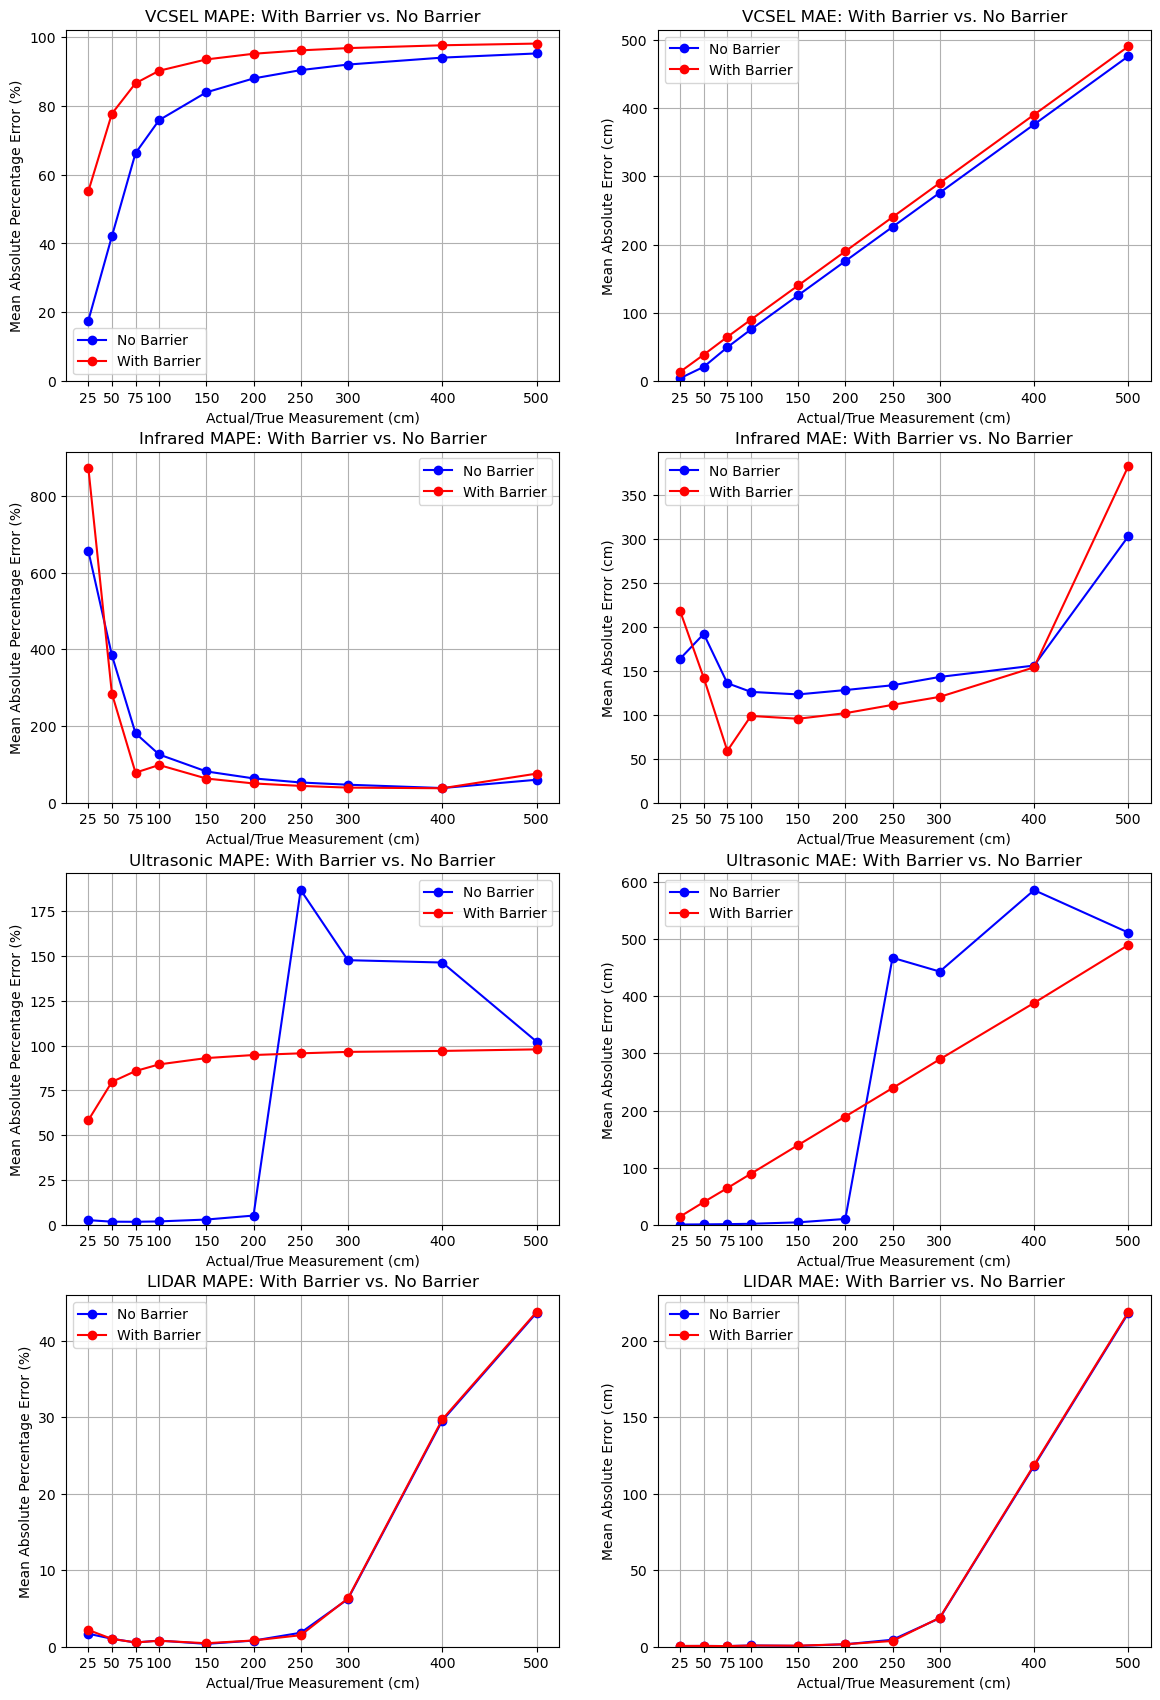

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(14, 21))
#Plot MAPE
plotsensorMetric(vcselNoBar_MAPE, vcselWithBar_MAPE, "VCSEL", "MAPE", axes[0,0])
plotsensorMetric(infraredNoBar_MAPE, infraredWithBar_MAPE, "Infrared", "MAPE", axes[1,0])
plotsensorMetric(ultrasonicNoBar_MAPE, ultrasonicWithBar_MAPE, "Ultrasonic", "MAPE", axes[2,0])
plotsensorMetric(lidarNoBar_MAPE, lidarWithBar_MAPE, "LIDAR", "MAPE", axes[3,0])
#Plot MAE
plotsensorMetric(vcselNoBar_MAE, vcselWithBar_MAE, "VCSEL", "MAE", axes[0,1])
plotsensorMetric(infraredNoBar_MAE, infraredWithBar_MAE, "Infrared", "MAE", axes[1,1])
plotsensorMetric(ultrasonicNoBar_MAE, ultrasonicWithBar_MAE, "Ultrasonic", "MAE", axes[2,1])
plotsensorMetric(lidarNoBar_MAE, lidarWithBar_MAE, "LIDAR", "MAE", axes[3,1])

plt.savefig("MAPE_MAE.jpg", dpi=1200)
plt.show()


The graphical representations illustrate that a significant __`Mean Absolute Percentage Error (MAPE)`__ does not always correspond to a significant __`Mean Absolute Error (MAE)`__. This observation is particularly evident in the plot pertaining to the infrared sensor. The reason for this disparity lies in the sensitivity of MAPE to instances where actual distances are small or approaches zero.

In [22]:
def computeMAPEPerActualVal_Big(df_sensor):
    """
    Compute the Mean Absolute Percentage Error (MAPE) of a sensor dataset by actual/true measurement partitions. 
    The computation focuses on Big objects detected condition and separates the No Barrier and With Barrier conditions.
    
    Args:
        df_sensor(pandas.DataFrame): sensor's dataframe
        
    Returns:
        tuple: MAPE of sensor's dataset by No Barrier and With Barrier filtered only for big objects
    """
    #Create separate dataframes for sensor dataset with Barrier and No Barrier focusing only on the distance and Big Objects detected
    mask_NoBar = df_sensor.columns.get_level_values(3) == "No Bar"
    mask_Big = df_sensor.columns.get_level_values(1) == 'Big'
    mask_Distance = df_sensor.columns.get_level_values(4) == 'Distance (cm):'
    df_sensorNoBarBig = df_sensor.loc[:, mask_NoBar & mask_Big & mask_Distance] #get only (sensor) dataset distance data no barrier
    df_sensorWithBarBig = df_sensor.loc[:, ~mask_NoBar & mask_Big & mask_Distance] #get only (sensor) dataset distance data with barrier
    sensorNoBarBig_MAPE, sensorWithBarBig_MAPE = {}, {} #initalize empty dictionaries
    for df_set in [df_sensorNoBarBig, df_sensorWithBarBig]:
        for i in range(int(len(df_set)/5)):
                actual_val = df_sensor.iloc[i*5,-1] #get the actual/true measurement value (every next 5 partitions)
                sensor_val_array = df_set.iloc[i*5:i*5+5,:].values.ravel() #get the sensor's measurements within (5 partitions)
                actual_val_array = np.full_like(sensor_val_array, actual_val) #create an array of actuael val with the same shape of sensor_val_array
                (sensorNoBarBig_MAPE if df_set is df_sensorNoBarBig else sensorWithBarBig_MAPE)[actual_val] = mean_absolute_percentage_error(actual_val_array, sensor_val_array)*100
    return (sensorNoBarBig_MAPE, sensorWithBarBig_MAPE)

In [23]:
#compute MAPE of each sensor datasets
vcselNoBarBig_MAPE, vcselWithBarBig_MAPE = computeMAPEPerActualVal_Big(df_vcsel)
infraredNoBarBig_MAPE, infraredWithBarBig_MAPE = computeMAPEPerActualVal_Big(df_infrared)
ultrasonicNoBarBig_MAPE, ultrasonicWithBarBig_MAPE = computeMAPEPerActualVal_Big(df_ultrasonic)
lidarNoBarBig_MAPE, lidarWithBarBig_MAPE = computeMAPEPerActualVal_Big(df_lidar)

In [24]:
def plotsensorMAPE_Big(vcsel_MAPE :dict, infrared_MAPE :dict, ultrasonic_MAPE :dict, lidar_MAPE :dict, barrierState :str, ax :matplotlib.axes.Axes):
    """
    Plot the results of the values returned by computeMAPEPerActualVal_Big() function
    
    
    Args:
        vcsel_MAPE(dict): MAPE values of vcsel
        infrared_MAPE(dict): MAPE values of infrared
        ultrasonic_MAPE(dict): MAPE values of ultrasonic
        barrierState(str): state of barrier
        ax(matplotlib.axes.Axes): axes to plot
    """
    ax.plot(vcsel_MAPE.keys(), vcsel_MAPE.values(), marker="o", color="b", label="VCSEL")
    ax.plot(infrared_MAPE.keys(), infrared_MAPE.values(), marker="o", color="r", label="Infrared")
    ax.plot(ultrasonic_MAPE.keys(), ultrasonic_MAPE.values(), marker="o", color="g", label="Ultrasonic")
    ax.plot(lidar_MAPE.keys(), lidar_MAPE.values(), marker="o", color="k", label="LIDAR")
    ax.set_title(f"Sensor MAPE: {barrierState} & Big Objects Detected Condition")
    ax.set_xticks([25, 50, 75, 100, 150, 200, 250, 300, 400, 500])
    ax.grid(True)
    ax.set_xlabel("Actual/True Measurement (cm)")
    ax.set_ylabel("Mean Absolute Percentage Error (%)")
    ax.set_ylim(bottom=0)
    ax.legend()

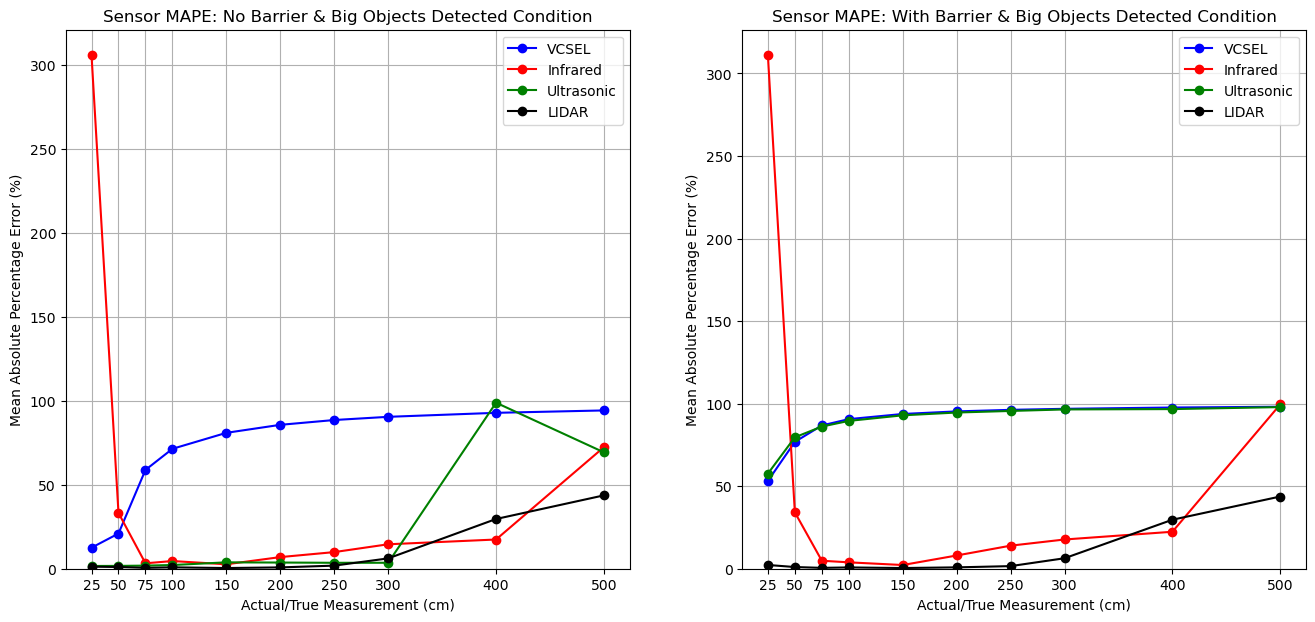

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
plotsensorMAPE_Big(vcselNoBarBig_MAPE, infraredNoBarBig_MAPE, ultrasonicNoBarBig_MAPE, lidarNoBarBig_MAPE, "No Barrier", axes[0])
plotsensorMAPE_Big(vcselWithBarBig_MAPE, infraredWithBarBig_MAPE, ultrasonicWithBarBig_MAPE, lidarWithBarBig_MAPE,"With Barrier", axes[1])
plt.savefig("MAPE Big Objects", dpi=600)
plt.show()

The plotted data reveals the instances where the sensors failed, as well as the magnitude of their mean percentage error.<br>
__No Barrier Insights:__ <br>
- The `VCSEL sensor` exhibited low percentage error at close distances, but it gradually increased as the distance of the test object increased. The error rate rose more slowly during successive measurements, as the default value returned by the sensor was dependent on its elevation from the ground.
- The `Infrared sensor`, on the other hand, had high percentage error at short distances, likely due to the specific infrared model utilized in the study, which had an effective range of 100 to 550 cm. To calculate values beyond the effective range, raw analog values measured by the sensor were passed to a linear function. Despite this limitation, the infrared sensor still produced accurate data at 75 cm, but an increase in error was observed at 250-300 cm.
- The `Ultrasonic sensor` generated accurate data up to the 300 cm mark, but a large error spike occurred at 400 cm, as the sensor returned a default value of 1175 cm when it did not detect any objects. The error percentage decreased on the 500 cm mark, as the sensor continued to return the same value.
- `Lidar` shows accurate measurement up to the 300 cm mark and returned a consistent default value on the succeding measurements.

__With Barrier Insights:__ <br>
- The plot indicated that both the `VCSEL and Ultrasonic sensors` were significantly affected. In contrast, the `Infrared sensor` was less affected by the barrier, although it did contribute to an increase in the error percentage as the distance of the test object to be detected increased. The `LIDAR`, in the meantime, demonstrates that the barrier has no significant effect on the measurement's value.

## Exploring Light-based Sensors

This section will examine how multiple variables may impact the readings of light-based sensors, focusing on the Infrared and Lidar sensors in particular:<br>
- Time of Day
- Color
- Barrier Presence

To easily handle and visualize the data on the next tasks we need to create a meltedDataFrame, we will to do the following: <br>
 1. create another copy of the dataframe of the sensor we will use.<br>
 2. create a pandas Series of the Actual Measurement column from the dataframe.<br>
 3. drop the Actual Measurment column from the dataframe.<br>
 4. Insert the pandas series created recently on the last level of the multi-indexed dataframe for each possible combinations of the first 4 levels by first creating a pandas multi index object.<br>
 5. create an unpivoted DataFrame by calling the stack method to easily visualize the data.<br>

In [26]:
def getMeltedDataFrame(df_sensor, cols_to_drop :list = []):
    """
    Get the unpivoted/melted equivalent of the df_sensor dataframe
    
    Args:
        df_sensor(pandas.DataFrame): sensor's dataframe
        col_to_drop(list, Optional): columns to drop from the dataframe before melting the dataframe
        
    Returns:
        pandas.DataFrame: unpivoted/melted equivalent of the dataframe 
    
    """
    df_sensor_copy = df_sensor.copy()
    actual_measurement_series = pd.Series(df_sensor_copy.iloc[:, -1].values, name="Actual Measurement (cm):")
    df_sensor_copy.drop("Actual Measurement (cm):", axis=1, level=0, inplace=True)
    #cols_to_drop = df_sensor.columns.get_level_values(4).values #get all measurement labels from level 4
    #cols_to_drop = np.delete(cols_to_drop, np.where(cols_to_drop == "Distance (cm):"))  #don't drop the distance
    df_sensor_copy.drop(cols_to_drop, axis=1, level=4, inplace=True)
    level0 = df_sensor_copy.columns.get_level_values(0).unique().values
    level1 = df_sensor_copy.columns.get_level_values(1).unique().values
    level2 = df_sensor_copy.columns.get_level_values(2).unique().values
    level3 = df_sensor_copy.columns.get_level_values(3).unique().values
    actual_measurement = np.array(['Actual Measurement (cm):'])
    newMultiIndexData = pd.MultiIndex.from_product([level0, level1, level2, level3, actual_measurement])
    for index in newMultiIndexData:
        df_sensor_copy[index] = actual_measurement_series.values
    df_sensor_copy.sort_index(axis=1, inplace=True)
    df_sensor_melted = df_sensor_copy.stack(level=[0,1,2,3])
    col_to_convert = ["Time of Day","Size","Color","Barrier"]
    df_sensor_melted.reset_index(level=col_to_convert, inplace=True)
    df_sensor_melted[col_to_convert] = df_sensor_melted[col_to_convert].astype('category')
    del df_sensor_copy #free memory
    return df_sensor_melted

#### Infrared Melted DataFrame

In [27]:
df_melted_infrared = getMeltedDataFrame(df_infrared, cols_to_drop=["Humidity (%):", "Lux (lux):", "Temp (°C):"])
df_melted_infrared["Absolute Error"] = (df_melted_infrared["Actual Measurement (cm):"] - df_melted_infrared["Distance (cm):"]).abs()
df_melted_infrared["Error Percentage %"] = ((df_melted_infrared["Actual Measurement (cm):"] - df_melted_infrared["Distance (cm):"])*100/df_melted_infrared["Actual Measurement (cm):"]).abs()

In [28]:
df_melted_infrared_aggregate = df_melted_infrared.groupby(by=["Actual Measurement (cm):","Time of Day","Color","Barrier"])[["Absolute Error", "Error Percentage %"]].mean()
df_melted_infrared_aggregate.reset_index(level=["Actual Measurement (cm):","Time of Day","Color","Barrier"], inplace=True)
display(df_melted_infrared_aggregate)

Measurements,Actual Measurement (cm):,Time of Day,Color,Barrier,Absolute Error,Error Percentage %
0,25,Day,Black,No Bar,433.924,1735.6960
1,25,Day,Black,With Bar,295.111,1180.4440
2,25,Day,White,No Bar,76.804,307.2160
3,25,Day,White,With Bar,427.888,1711.5520
4,25,Night,Black,No Bar,68.179,272.7160
...,...,...,...,...,...,...
75,500,Day,White,With Bar,100.333,20.0666
76,500,Night,Black,No Bar,510.678,102.1356
77,500,Night,Black,With Bar,613.831,122.7662
78,500,Night,White,No Bar,511.824,102.3648


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


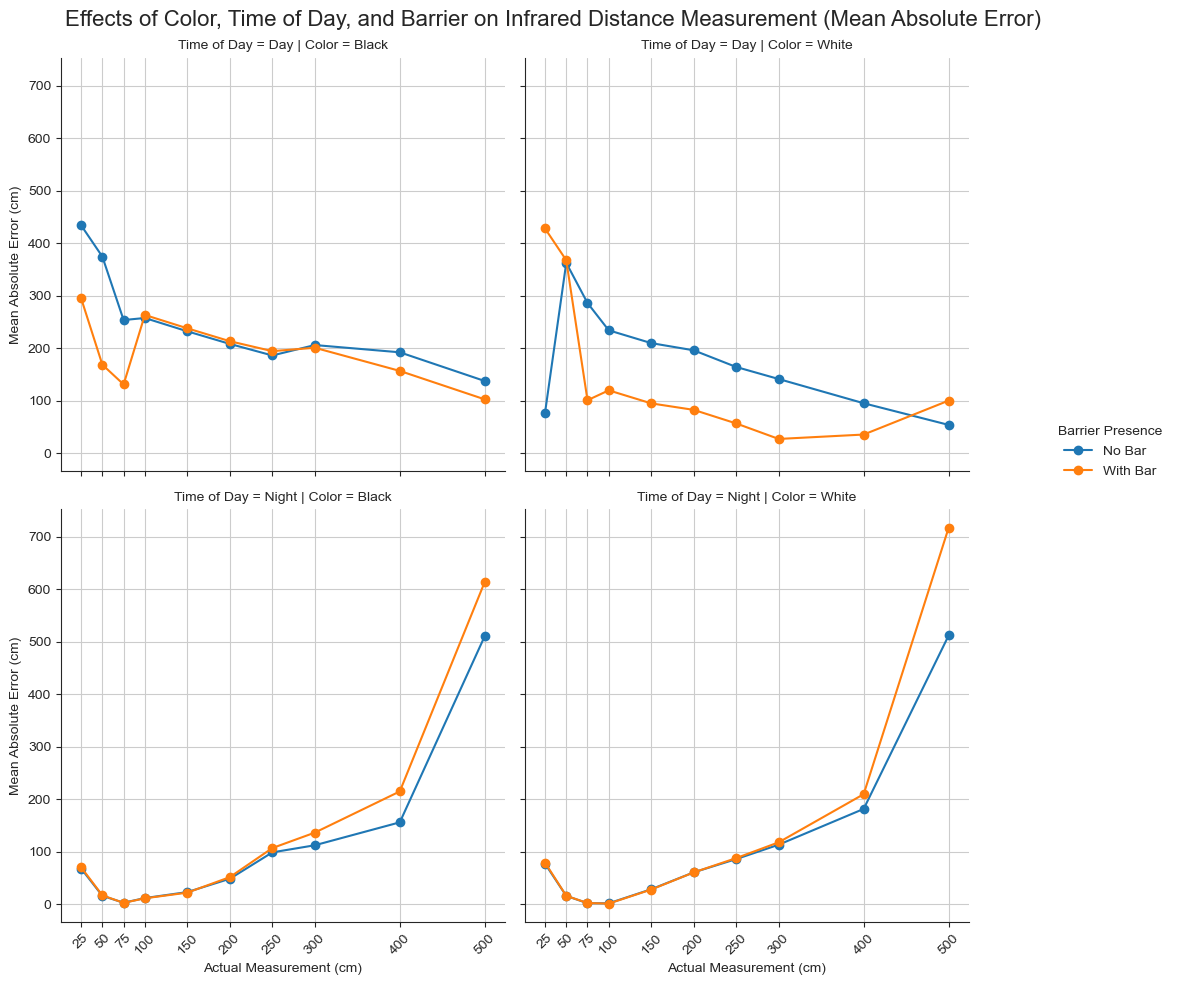

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


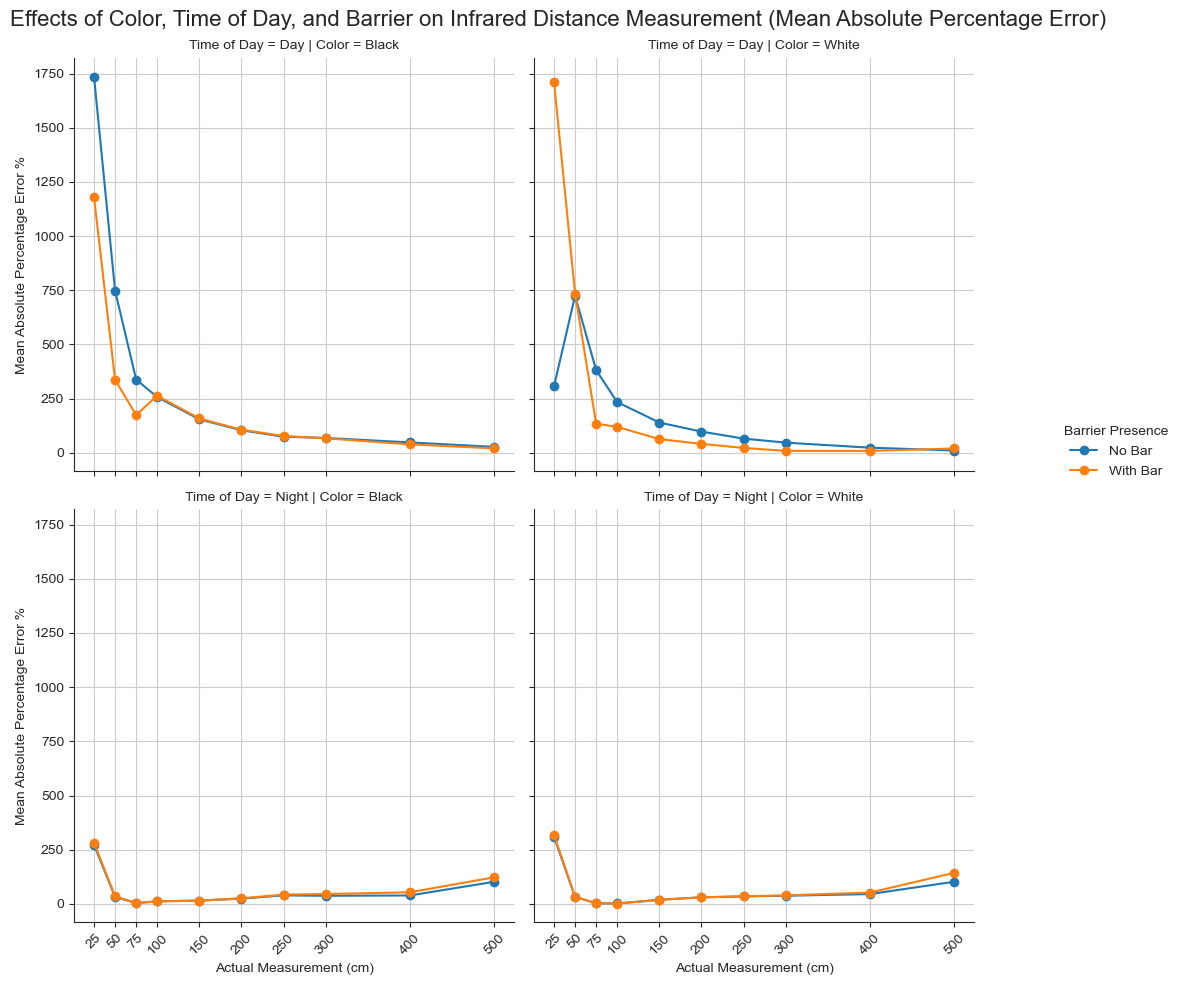

In [29]:
sns.set_style("ticks",{'axes.grid' : True})

for x,titleLabel in enumerate(["Mean Absolute Error", "Mean Absolute Percentage Error"]):
    g = sns.FacetGrid(
        data=df_melted_infrared_aggregate,
        col="Color",
        row="Time of Day",
        hue="Barrier",
        height=5,
    )

    y_val = "Absolute Error" if x == 0 else "Error Percentage %"
    y_label = "Mean Absolute Error (cm)" if x == 0 else "Mean Absolute Percentage Error %"
    g.map(plt.plot, "Actual Measurement (cm):", y_val, marker="o").add_legend(title="Barrier Presence")
    g.set(xticks=[25, 50, 75, 100, 150, 200, 250, 300, 400, 500])
    g.set_xticklabels([25, 50, 75, 100, 150, 200, 250, 300, 400, 500], rotation=45)
    g.figure.suptitle(f"Effects of Color, Time of Day, and Barrier on Infrared Distance Measurement ({titleLabel})", fontsize=16)
    g.set_axis_labels("Actual Measurement (cm)", y_label, fontsize=10)
    sns.move_legend(g, "lower center", bbox_to_anchor=(1, .5))
    g.tight_layout()
    plt.savefig(f"{titleLabel} Infrared", dpi=600, bbox_inches = 'tight')
    plt.show()

The plot demonstrates that the infrared sensor reads more accurately at night and that the results are impacted by the presence of a transparent barrier.

#### LIDAR Melted DataFrame

In [30]:
df_melted_lidar = getMeltedDataFrame(df_lidar, cols_to_drop=["Humidity (%):", "Lux (lux):", "Temp (°C):"])
df_melted_lidar["Absolute Error"] = (df_melted_lidar["Actual Measurement (cm):"] - df_melted_lidar["Distance (cm):"]).abs()
df_melted_lidar["Error Percentage %"] = ((df_melted_lidar["Actual Measurement (cm):"] - df_melted_lidar["Distance (cm):"])*100/df_melted_lidar["Actual Measurement (cm):"]).abs()

In [31]:
df_melted_lidar_aggregate = df_melted_lidar.groupby(by=["Actual Measurement (cm):","Time of Day","Color","Barrier"])[["Absolute Error", "Error Percentage %"]].mean()
df_melted_lidar_aggregate.reset_index(level=["Actual Measurement (cm):","Time of Day","Color","Barrier"], inplace=True)
display(df_melted_lidar_aggregate)

Measurements,Actual Measurement (cm):,Time of Day,Color,Barrier,Absolute Error,Error Percentage %
0,25,Day,Black,No Bar,0.272,1.0880
1,25,Day,Black,With Bar,0.322,1.2880
2,25,Day,White,No Bar,0.706,2.8240
3,25,Day,White,With Bar,0.236,0.9440
4,25,Night,Black,No Bar,0.237,0.9480
...,...,...,...,...,...,...
75,500,Day,White,With Bar,209.126,41.8252
76,500,Night,Black,No Bar,231.734,46.3468
77,500,Night,Black,With Bar,231.304,46.2608
78,500,Night,White,No Bar,230.806,46.1612


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


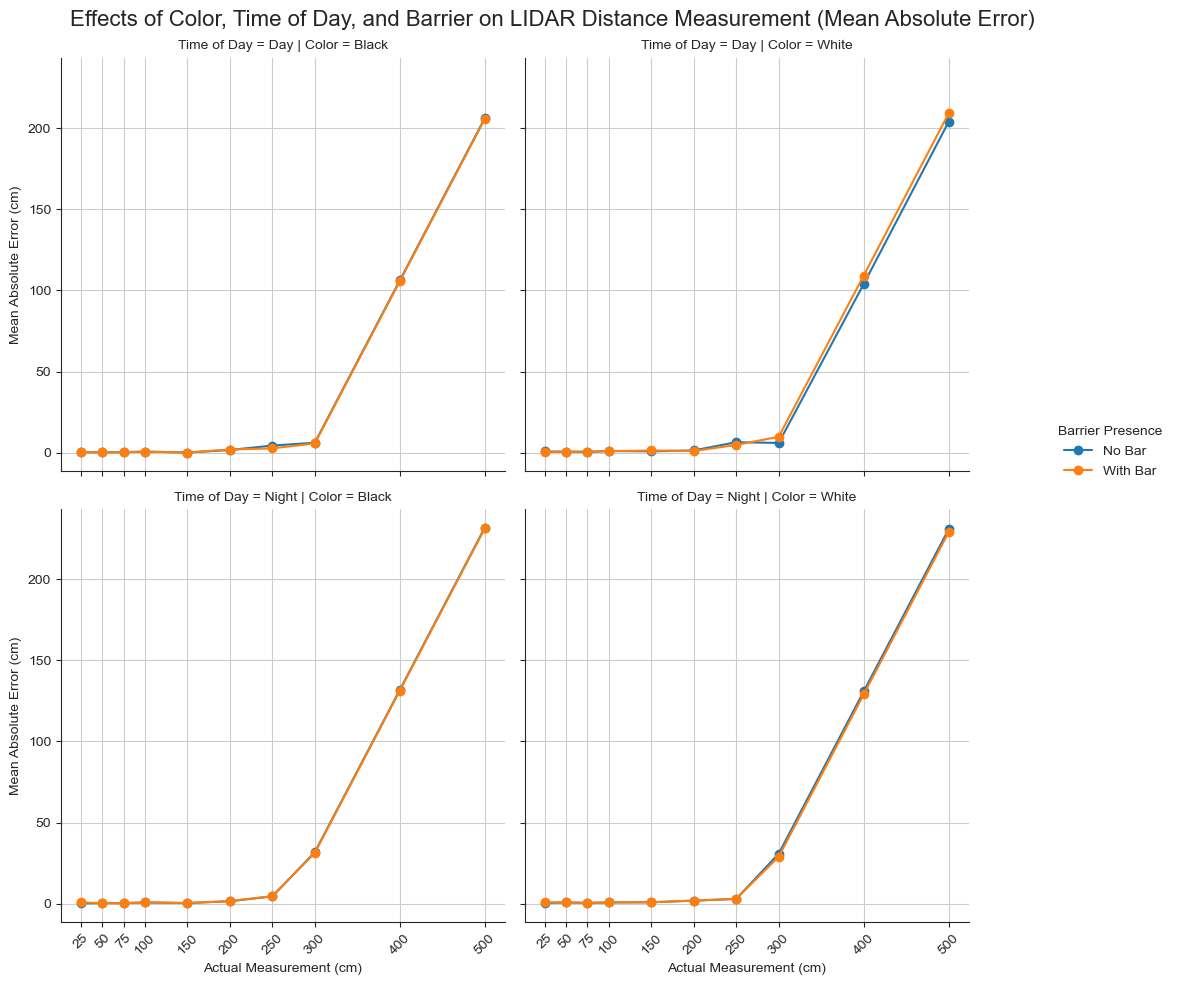

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


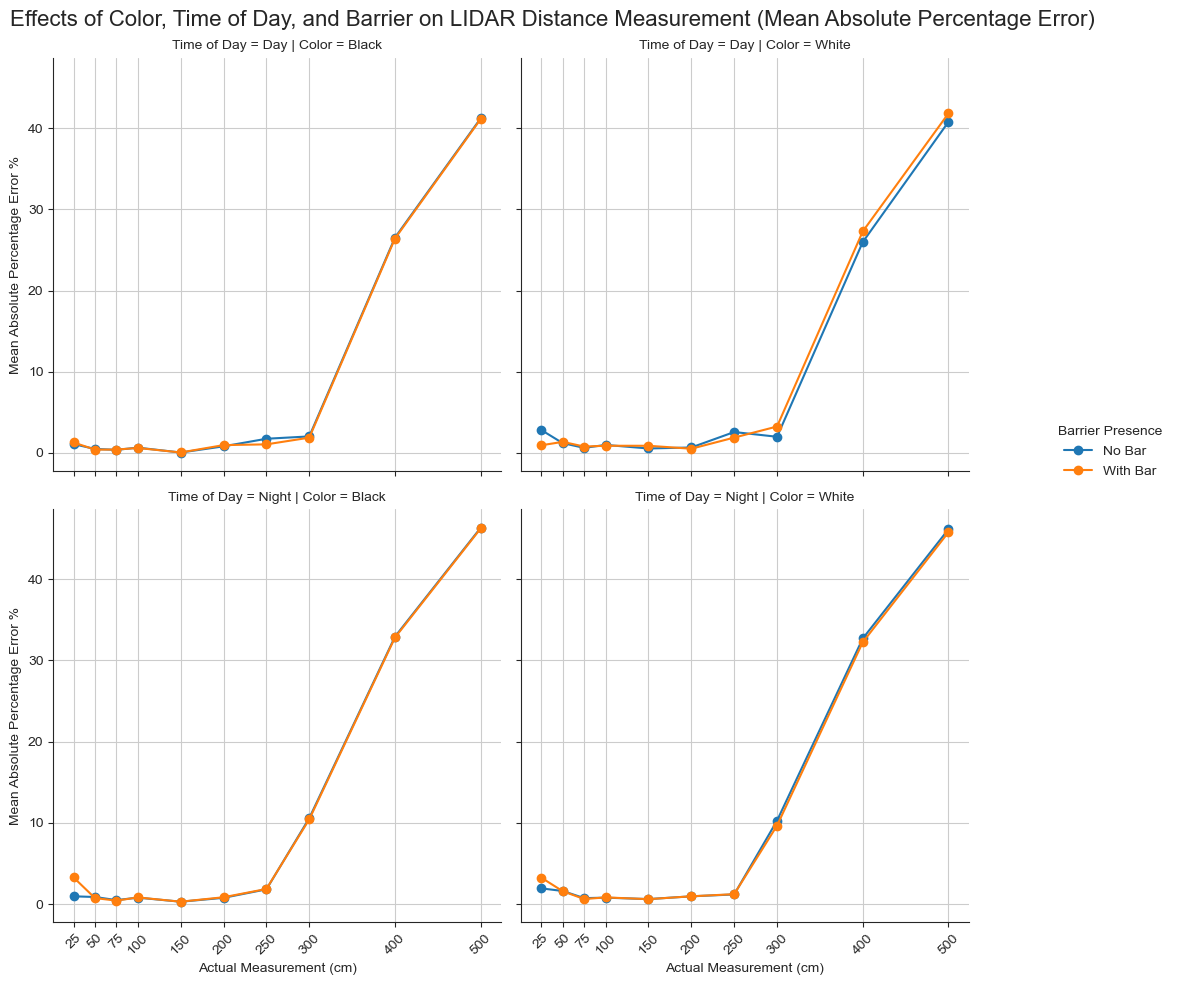

In [32]:
for x,titleLabel in enumerate(["Mean Absolute Error", "Mean Absolute Percentage Error"]):
    g = sns.FacetGrid(
        data=df_melted_lidar_aggregate,
        col="Color",
        row="Time of Day",
        hue="Barrier",
        height=5,
    )

    y_val = "Absolute Error" if x == 0 else "Error Percentage %"
    y_label = "Mean Absolute Error (cm)" if x == 0 else "Mean Absolute Percentage Error %"
    g.map(plt.plot, "Actual Measurement (cm):", y_val, marker="o").add_legend(title="Barrier Presence")
    g.set(xticks=[25, 50, 75, 100, 150, 200, 250, 300, 400, 500])
    g.set_xticklabels([25, 50, 75, 100, 150, 200, 250, 300, 400, 500], rotation=45)
    g.figure.suptitle(f"Effects of Color, Time of Day, and Barrier on LIDAR Distance Measurement ({titleLabel})", fontsize=16)
    g.set_axis_labels("Actual Measurement (cm)", y_label, fontsize=10)
    sns.move_legend(g, "lower center", bbox_to_anchor=(1, .5))
    g.tight_layout()
    plt.savefig(f"{titleLabel} Lidar", dpi=600, bbox_inches = 'tight')
    plt.show()

The plot demonstrates that the barrier has little to no discernible impact on the `LIDAR` readings and that daylight readings are more accurate.

## Data Integration

To obtain the merged dataframe for all sensors, we will extract the melted data of each sensor and exclude the columns representing the measurement conditions. Subsequently, we will combine the individual sensor dataframes into a unified dataframe. Due to the identical index values shared by all sensors, we will retain the index values from a single sensor before the concatenation process. This unified index will facilitate stratification of the dataframe during the train_test_split step prior to model training.

In [33]:
df_infrared_melted = getMeltedDataFrame(df_infrared)
df_ultrasonic_melted = getMeltedDataFrame(df_ultrasonic)
df_vcsel_melted = getMeltedDataFrame(df_vcsel)
df_lidar_melted = getMeltedDataFrame(df_lidar)

In [34]:
df_infrared_melted = df_infrared_melted.reset_index().drop(["Actual Measurement (cm):","index","Time of Day","Size","Color","Barrier"], axis=1)
updateColumnNames = ['Infrared_' + col for col in df_infrared_melted.columns]
df_infrared_melted.rename(columns=dict(zip(df_infrared_melted.columns, updateColumnNames)), inplace=True)
display(df_infrared_melted)

Measurements,Infrared_Distance (cm):,Infrared_Humidity (%):,Infrared_Lux (lux):,Infrared_Temp (°C):
0,101.48,69.5,40.00,32.4
1,101.17,69.5,38.33,32.3
2,98.67,69.2,35.83,32.3
3,116.66,69.4,38.33,32.2
4,829.40,67.9,35.00,32.4
...,...,...,...,...
795,-664.71,99.9,0.00,27.9
796,104.58,99.9,0.00,29.7
797,106.43,99.9,0.00,29.6
798,103.08,99.9,0.00,30.4


In [35]:
df_ultrasonic_melted = df_ultrasonic_melted.reset_index().drop(["Actual Measurement (cm):","index","Time of Day","Size","Color","Barrier"], axis=1)
updateColumnNames = ['Ultrasonic_' + col for col in df_ultrasonic_melted.columns]
df_ultrasonic_melted.rename(columns=dict(zip(df_ultrasonic_melted.columns, updateColumnNames)), inplace=True)
display(df_ultrasonic_melted)

Measurements,Ultrasonic_Distance (cm):,Ultrasonic_Humidity (%):,Ultrasonic_Lux (lux):,Ultrasonic_Temp (°C):
0,25.48,63.8,1660.00,34.7
1,10.52,63.5,1171.67,34.7
2,25.43,63.6,1575.00,34.7
3,10.59,63.7,1046.67,34.7
4,26.54,64.1,1923.33,34.7
...,...,...,...,...
795,10.32,99.9,0.00,30.4
796,1175.67,99.9,0.00,30.4
797,10.95,99.9,0.00,30.3
798,1175.58,99.9,0.00,30.3


In [36]:
df_vcsel_melted = df_vcsel_melted.reset_index().drop(["Actual Measurement (cm):","index","Time of Day","Size","Color","Barrier"], axis=1)
updateColumnNames = ['VCSEL_' + col for col in df_vcsel_melted.columns]
df_vcsel_melted.rename(columns=dict(zip(df_vcsel_melted.columns, updateColumnNames)), inplace=True)
display(df_vcsel_melted)

Measurements,VCSEL_Distance (cm):,VCSEL_Humidity (%):,VCSEL_Lux (lux):,VCSEL_Temp (°C):
0,20.8,78.5,83.33,32.9
1,9.8,78.1,85.00,32.9
2,26.9,79.0,99.17,32.9
3,12.3,78.3,90.00,32.8
4,18.5,80.1,90.00,33.0
...,...,...,...,...
795,9.4,99.9,0.00,29.9
796,21.5,99.9,0.00,29.7
797,9.7,99.9,0.00,29.7
798,21.6,99.9,0.00,29.7


In [37]:
df_lidar_melted = df_lidar_melted.reset_index() #dont'drop ["Time of Day","Size","Color","Barrier"]
colToUpdate = ["Distance (cm):", "Humidity (%):", "Lux (lux):", "Temp (°C):"]
updateColumnNames = ['Lidar_' + col for col in colToUpdate]
df_lidar_melted.rename(columns=dict(zip(colToUpdate, updateColumnNames)), inplace=True)
display(df_lidar_melted)

Measurements,index,Time of Day,Size,Color,Barrier,Actual Measurement (cm):,Lidar_Distance (cm):,Lidar_Humidity (%):,Lidar_Lux (lux):,Lidar_Temp (°C):
0,M1.1,Day,Big,Black,No Bar,25,24.67,91.80,80.83,32.50
1,M1.1,Day,Big,Black,With Bar,25,24.49,91.80,80.83,32.50
2,M1.1,Day,Big,White,No Bar,25,25.12,92.50,87.50,32.30
3,M1.1,Day,Big,White,With Bar,25,25.15,92.50,87.50,32.30
4,M1.1,Day,Small,Black,No Bar,25,24.83,91.80,80.83,32.50
...,...,...,...,...,...,...,...,...,...,...
795,M10.5,Night,Big,White,With Bar,500,271.02,94.95,1.67,31.11
796,M10.5,Night,Small,Black,No Bar,500,264.31,90.99,1.67,31.16
797,M10.5,Night,Small,Black,With Bar,500,268.70,93.43,1.67,31.09
798,M10.5,Night,Small,White,No Bar,500,275.71,93.69,1.67,31.12


In [38]:
df_sensors = pd.concat([df_infrared_melted, df_ultrasonic_melted, df_vcsel_melted, df_lidar_melted], axis=1)

## Dataset Split

In [39]:
from sklearn.model_selection import train_test_split
X = df_sensors.loc[:, df_sensors.columns != "Actual Measurement (cm):"]
y = df_sensors.loc[:, "Actual Measurement (cm):"]
#stratify the splitting based on the index value of X dataFrame
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, stratify=X["index"], random_state=41)

#We don't need the index column anymore for prediction, since it was only used for stratifying
#We also drop "Time of Day","Size","Color","Barrier" to avoid the model from learning the actual conditions of the measurement
#But we need to save it on another dataframe to append it back during plot comparison of the model and the sensors readings
X_trainVal_conditions = X_trainVal.loc[:, ["Time of Day","Size","Color","Barrier"]]
X_trainVal.drop(["index","Time of Day","Size","Color","Barrier"], axis=1, inplace=True)
X_test_conditions = X_test.loc[:, ["Time of Day","Size","Color","Barrier"]]
X_test.drop(["index","Time of Day","Size","Color","Barrier"], axis=1, inplace=True)

Let's see the how correlated the features are.

In [40]:
corr_matrix = X_trainVal.corr()
display(corr_matrix)

Measurements,Infrared_Distance (cm):,Infrared_Humidity (%):,Infrared_Lux (lux):,Infrared_Temp (°C):,Ultrasonic_Distance (cm):,Ultrasonic_Humidity (%):,Ultrasonic_Lux (lux):,Ultrasonic_Temp (°C):,VCSEL_Distance (cm):,VCSEL_Humidity (%):,VCSEL_Lux (lux):,VCSEL_Temp (°C):,Lidar_Distance (cm):,Lidar_Humidity (%):,Lidar_Lux (lux):,Lidar_Temp (°C):
Measurements,,,,,,,,,,,,,,,,
Infrared_Distance (cm):,1.000000,-0.607321,0.494677,0.348731,0.145176,-0.242054,0.287408,0.433871,-0.071884,-0.566367,0.698608,0.564100,0.229653,-0.393182,0.475513,0.469338
Infrared_Humidity (%):,-0.607321,1.000000,-0.919818,-0.583350,0.060541,0.720961,-0.719290,-0.905949,0.000250,0.915186,-0.958678,-0.914394,0.009004,0.670754,-0.933169,-0.867025
Infrared_Lux (lux):,0.494677,-0.919818,1.000000,0.538027,-0.108369,-0.797738,0.803562,0.887533,-0.031358,-0.797157,0.843517,0.802924,-0.194686,-0.566801,0.934932,0.828498
Infrared_Temp (°C):,0.348731,-0.583350,0.538027,1.000000,-0.012741,-0.402125,0.403137,0.513029,0.028435,-0.548273,0.567614,0.545888,0.029668,-0.417908,0.538104,0.501876
Ultrasonic_Distance (cm):,0.145176,0.060541,-0.108369,-0.012741,1.000000,0.194693,-0.178866,-0.124691,0.262562,0.104766,0.009368,-0.114732,0.464162,-0.058651,-0.122187,-0.127435
Ultrasonic_Humidity (%):,-0.242054,0.720961,-0.797738,-0.402125,0.194693,1.000000,-0.975504,-0.932611,0.011355,0.590804,-0.587324,-0.601281,0.420656,0.362233,-0.774462,-0.804118
Ultrasonic_Lux (lux):,0.287408,-0.719290,0.803562,0.403137,-0.178866,-0.975504,1.000000,0.914234,0.006300,-0.583318,0.586960,0.595130,-0.427390,-0.346846,0.771355,0.800993
Ultrasonic_Temp (°C):,0.433871,-0.905949,0.887533,0.513029,-0.124691,-0.932611,0.914234,1.000000,-0.003158,-0.779671,0.812716,0.782462,-0.191882,-0.545833,0.888111,0.897508
VCSEL_Distance (cm):,-0.071884,0.000250,-0.031358,0.028435,0.262562,0.011355,0.006300,-0.003158,1.000000,-0.046810,-0.022795,0.052629,-0.026404,0.003942,0.009622,-0.030643


## Feature Selection

To minimize the complexity and improve the computational performance/speed of the models to be trained. This section attempts to select the most important features from the dataset. Since the model's goal is regression, we will use sklearn's SelectFromModel to select our main features to use for training and use Lasso as our estimator argument as it offers sparse solutions which could lead estimated coeffecients to be zero thus allowing SelectFromModel to select features with non-zero coefficients.

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

selectFeatures = SelectFromModel(Lasso(alpha=10))
selectFeatures.fit(X_trainVal, y_trainVal)
selectedFeatureNames = X_trainVal.columns[selectFeatures.get_support(indices=True)]
X_trainVal_filtered = selectFeatures.transform(X_trainVal)
#X_train_filter is a numpy array, re-assign the column names back
X_trainVal_filtered = pd.DataFrame(X_trainVal_filtered, columns=selectedFeatureNames, index=X_trainVal.index)

X_test_filtered = selectFeatures.transform(X_test)
#X_test_filter is a numpy array, re-assign the column names back
X_test_filtered = pd.DataFrame(X_test_filtered, columns=selectedFeatureNames, index=X_test.index)
print("X_train shape before feature selection: {}".format(X_trainVal.shape))
print("X_train_filtered shape after feature selection: {}".format(X_trainVal_filtered.shape))

X_train shape before feature selection: (600, 16)
X_train_filtered shape after feature selection: (600, 10)


Columns selected by the feature selection model and LASSO:
['Infrared_Distance (cm):' 'Infrared_Humidity (%):' 'Infrared_Temp (°C):'
 'Ultrasonic_Distance (cm):' 'Ultrasonic_Lux (lux):'
 'VCSEL_Distance (cm):' 'VCSEL_Humidity (%):' 'VCSEL_Lux (lux):'
 'Lidar_Distance (cm):' 'Lidar_Lux (lux):']


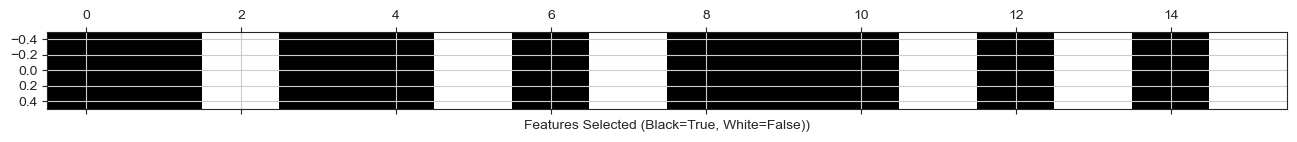

In [42]:
mask = selectFeatures.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Features Selected (Black=True, White=False))")
plt.yticks()
print("Columns selected by the feature selection model and LASSO:")
print(X_trainVal.columns[mask].values)

### Random Forest GridSearch

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_param_grid={
    "n_estimators":[10,50,100],
    "criterion":["squared_error", "absolute_error", "friedman_mse"],
    "max_features":["auto", "sqrt"]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, return_train_score=True)
rf_grid_search.fit(X_trainVal_filtered, y_trainVal)

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remov

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remov

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

In [44]:
print("Test set score: {:.2f}".format(rf_grid_search.score(X_test_filtered, y_test)))
print("Best parameters: {}".format(rf_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(rf_grid_search.best_score_))
print("Best estimator:\n{}".format(rf_grid_search.best_estimator_))

Test set score: 0.90
Best parameters: {'criterion': 'absolute_error', 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation score: 0.91
Best estimator:
RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      random_state=42)


### Ridge Regression GridSearch

We will use ridge regression instead of linear regression to deal with the multicollinearity of data

In [45]:
from sklearn.linear_model import Ridge
ridge_param_grid={
    "alpha":[0.1,1,10,20],
    "fit_intercept":[True, False]
}

ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, return_train_score=True)
ridge_grid_search.fit(X_trainVal_filtered, y_trainVal)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 20],
                         'fit_intercept': [True, False]},
             return_train_score=True)

In [46]:
print("Test set score: {:.2f}".format(ridge_grid_search.score(X_test_filtered, y_test)))
print("Best parameters: {}".format(ridge_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(ridge_grid_search.best_score_))
print("Best estimator:\n{}".format(ridge_grid_search.best_estimator_))

Test set score: 0.87
Best parameters: {'alpha': 0.1, 'fit_intercept': True}
Best cross-validation score: 0.87
Best estimator:
Ridge(alpha=0.1)


### K-Nearest Neighbors GridSearch

In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn_param_grid={
    "n_neighbors":[1,3,5],
        "algorithm":["auto", "brute", "ball_tree", "kd_tree"]
}

knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, return_train_score=True)
knn_grid_search.fit(X_trainVal_filtered, y_trainVal)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'brute', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [1, 3, 5]},
             return_train_score=True)

In [48]:
print("Test set score: {:.2f}".format(knn_grid_search.score(X_test_filtered, y_test)))
print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(knn_grid_search.best_score_))
print("Best estimator:\n{}".format(knn_grid_search.best_estimator_))

Test set score: 0.92
Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5}
Best cross-validation score: 0.91
Best estimator:
KNeighborsRegressor(algorithm='ball_tree')


In [49]:
y_predictions_rf = pd.DataFrame(rf_grid_search.predict(X_test_filtered), columns=["Predictions_RandomForest"], index=X_test_filtered.index)
y_predictions_ridge = pd.DataFrame(ridge_grid_search.predict(X_test_filtered), columns=["Predictions_Ridge"], index=X_test_filtered.index)
y_predictions_knn = pd.DataFrame(knn_grid_search.predict(X_test_filtered), columns=["Predictions_KNN"], index=X_test_filtered.index)

X_testWithConditionsPredictionsActual = pd.concat([X_test_conditions, X_test_filtered, y_test, y_predictions_rf, y_predictions_ridge, y_predictions_knn], axis=1)
display(X_testWithConditionsPredictionsActual)

,Time of Day,Size,Color,Barrier,Infrared_Distance (cm):,Infrared_Humidity (%):,Infrared_Temp (°C):,Ultrasonic_Distance (cm):,Ultrasonic_Lux (lux):,VCSEL_Distance (cm):,VCSEL_Humidity (%):,VCSEL_Lux (lux):,Lidar_Distance (cm):,Lidar_Lux (lux):,Actual Measurement (cm):,Predictions_RandomForest,Predictions_Ridge,Predictions_KNN
174,Night,Small,White,No Bar,77.50,99.9,29.8,75.72,0.00,21.2,99.9,0.00,75.65,0.00,75,78.25,42.180777,75.0
398,Night,Small,White,No Bar,103.08,99.9,30.4,146.23,0.00,21.6,99.9,0.00,150.95,0.00,150,148.50,160.319239,150.0
357,Day,Small,Black,With Bar,614.77,77.1,31.9,11.19,198.33,9.0,78.3,87.50,150.06,37.50,150,138.50,143.884601,150.0
324,Day,Small,Black,No Bar,623.05,76.9,31.9,148.82,236.67,18.1,78.9,95.83,149.95,36.67,150,146.50,140.940473,150.0
381,Night,Small,Black,With Bar,105.68,99.9,29.6,9.67,0.00,9.9,99.9,0.00,150.37,0.00,150,153.50,165.220320,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Night,Big,White,No Bar,78.15,99.9,29.3,73.25,0.00,33.6,99.9,0.00,75.68,0.00,75,75.00,34.595406,75.0
433,Day,Big,Black,With Bar,202.32,77.8,31.9,10.60,217.50,10.7,79.8,68.33,197.26,44.17,200,195.50,234.795977,200.0
634,Night,Big,White,No Bar,272.49,99.9,28.8,290.38,0.00,25.7,99.9,0.00,275.75,1.67,300,334.00,360.946039,300.0
333,Night,Small,Black,With Bar,105.72,99.9,29.5,9.78,0.00,10.4,99.9,0.00,150.43,0.00,150,148.50,165.249802,150.0


In [50]:
#Compute the MAPE and MAE of each sensor by actual measurement partitions
for sensorType in ["Infrared", "Ultrasonic", "VCSEL", "Lidar"]:
    X_testWithConditionsPredictionsActual[f"{sensorType} Absolute Error"] = (X_testWithConditionsPredictionsActual["Actual Measurement (cm):"] - X_testWithConditionsPredictionsActual[f"{sensorType}_Distance (cm):"]).abs()
    X_testWithConditionsPredictionsActual[f"{sensorType} Error Percentage %"] = ((X_testWithConditionsPredictionsActual["Actual Measurement (cm):"] - X_testWithConditionsPredictionsActual[f"{sensorType}_Distance (cm):"])*100/X_testWithConditionsPredictionsActual["Actual Measurement (cm):"]).abs()

#Add the models' MAPE and MAE
models = ["RandomForest", "Ridge", "KNN"]
for model in models:  
    X_testWithConditionsPredictionsActual[f"{model} Absolute Error"] = (X_testWithConditionsPredictionsActual["Actual Measurement (cm):"] - X_testWithConditionsPredictionsActual[f"Predictions_{model}"]).abs()
    X_testWithConditionsPredictionsActual[f"{model} Error Percentage %"] = ((X_testWithConditionsPredictionsActual["Actual Measurement (cm):"] - X_testWithConditionsPredictionsActual[f"Predictions_{model}"])*100/X_testWithConditionsPredictionsActual["Actual Measurement (cm):"]).abs()

In [51]:
sensors = ["Ultrasonic", "Infrared", "VCSEL", "Lidar"]
metrics = ["Error Percentage %", "Absolute Error"]

sensor_metric = []
for sensor_model in sensors + models:
    for metric in metrics:
        sensor_metric.append(f"{sensor_model} {metric}")

#compute for MAPE and MAE
X_testWithConditionsPredictionsActual_aggregate = X_testWithConditionsPredictionsActual.groupby(by=["Actual Measurement (cm):", "Barrier"])[sensor_metric].mean()
X_testWithConditionsPredictionsActual_aggregate.reset_index(level=["Actual Measurement (cm):", "Barrier"], inplace=True)
display(X_testWithConditionsPredictionsActual_aggregate)

,Actual Measurement (cm):,Barrier,Ultrasonic Error Percentage %,Ultrasonic Absolute Error,Infrared Error Percentage %,Infrared Absolute Error,VCSEL Error Percentage %,VCSEL Absolute Error,Lidar Error Percentage %,Lidar Absolute Error,RandomForest Error Percentage %,RandomForest Absolute Error,Ridge Error Percentage %,Ridge Absolute Error,KNN Error Percentage %,KNN Absolute Error
0,25,No Bar,2.808000,0.702000,913.376000,228.344000,19.480000,4.870000,1.680000,0.420000,5.700000,1.425000,52.277787,13.069447,16.000000,4.000000
1,25,With Bar,58.148000,14.537000,888.540000,222.135000,56.280000,14.070000,1.988000,0.497000,4.400000,1.100000,31.215039,7.803760,38.000000,9.500000
2,50,No Bar,0.949091,0.474545,257.580000,128.790000,32.854545,16.427273,1.040000,0.520000,0.909091,0.454545,30.214301,15.107151,20.909091,10.454545
3,50,With Bar,79.755556,39.877778,547.124444,273.562222,76.911111,38.455556,1.095556,0.547778,0.444444,0.222222,51.319169,25.659585,14.444444,7.222222
4,75,No Bar,1.820513,1.365385,61.200000,45.900000,63.958974,47.969231,0.564103,0.423077,0.487179,0.365385,38.719369,29.039527,1.025641,0.769231
5,75,With Bar,85.872381,64.404286,71.447619,53.585714,85.866667,64.400000,0.579048,0.434286,1.904762,1.428571,20.695987,15.521990,7.619048,5.714286
6,100,No Bar,2.134545,2.134545,83.881818,83.881818,76.590909,76.590909,0.888182,0.888182,3.636364,3.636364,17.386690,17.386690,2.727273,2.727273
7,100,With Bar,89.524444,89.524444,187.576667,187.576667,89.833333,89.833333,0.801111,0.801111,3.166667,3.166667,16.022838,16.022838,2.222222,2.222222
8,150,No Bar,2.180000,3.270000,138.898519,208.347778,86.540741,129.811111,0.274074,0.411111,1.962963,2.944444,5.299100,7.948650,1.481481,2.222222
9,150,With Bar,93.085455,139.628182,141.124242,211.686364,93.539394,140.309091,0.471515,0.707273,2.424242,3.636364,8.188170,12.282256,1.818182,2.727273


## Prediction Visualization

In this section, we are about to explore the MAPE and MAE of the models against each of the sensor readings by actual measurement partitions. The visualization combines all of the measurement under different combination of conditions.

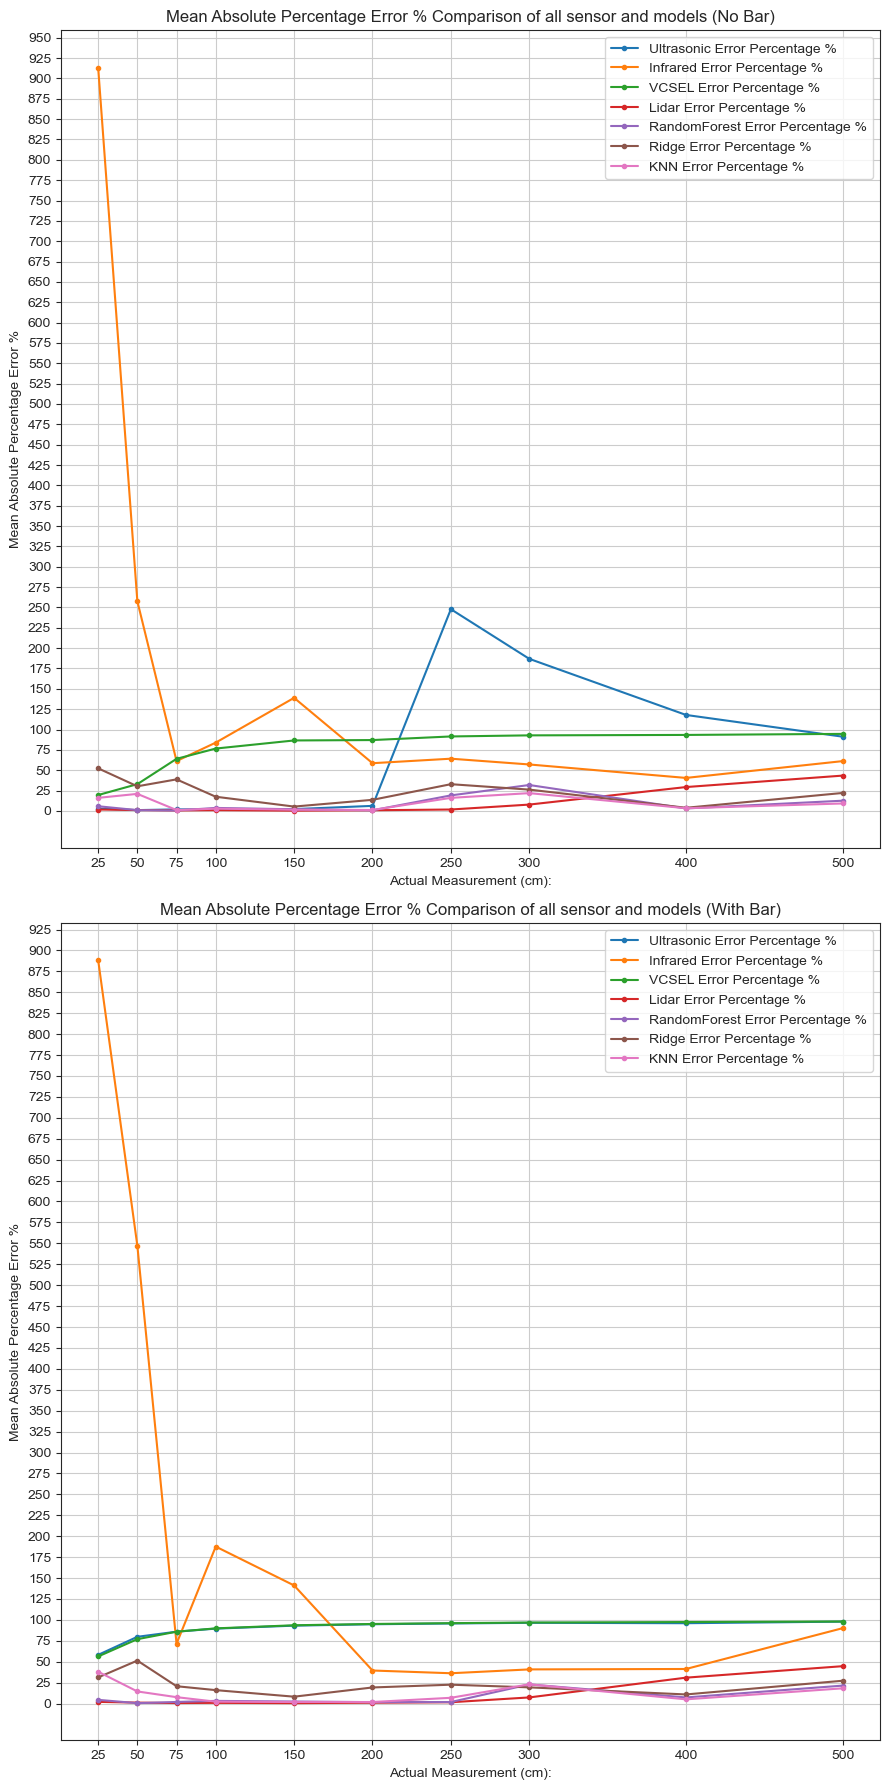

In [52]:
#Create list of column names of sensor and models MAPE
sensor_models_MAPE = []
for sensor in sensors + models:
    sensor_models_MAPE.append(f"{sensor} {metrics[0]}")

fig, axes = plt.subplots(2, 1, figsize=(9,18))
X_test_grouped = X_testWithConditionsPredictionsActual_aggregate.groupby("Barrier")

for (key, ax) in zip(X_test_grouped.groups.keys(), axes.flatten()):
    X_test_grouped.get_group(key).plot(x="Actual Measurement (cm):", y=sensor_models_MAPE, ax=ax, marker=".")
    ax.set_xticks([25, 50, 75, 100, 150, 200, 250, 300, 400, 500])
    ax.set_ylabel("Mean Absolute Percentage Error %")
    ax.set_yticks(np.arange(0, ax.get_ylim()[1], 25))
    ax.set_title(f"Mean Absolute Percentage Error % Comparison of all sensor and models ({key})")

plt.tight_layout()
plt.savefig(f"MAPE All sensors and models", dpi=600)
plt.show()

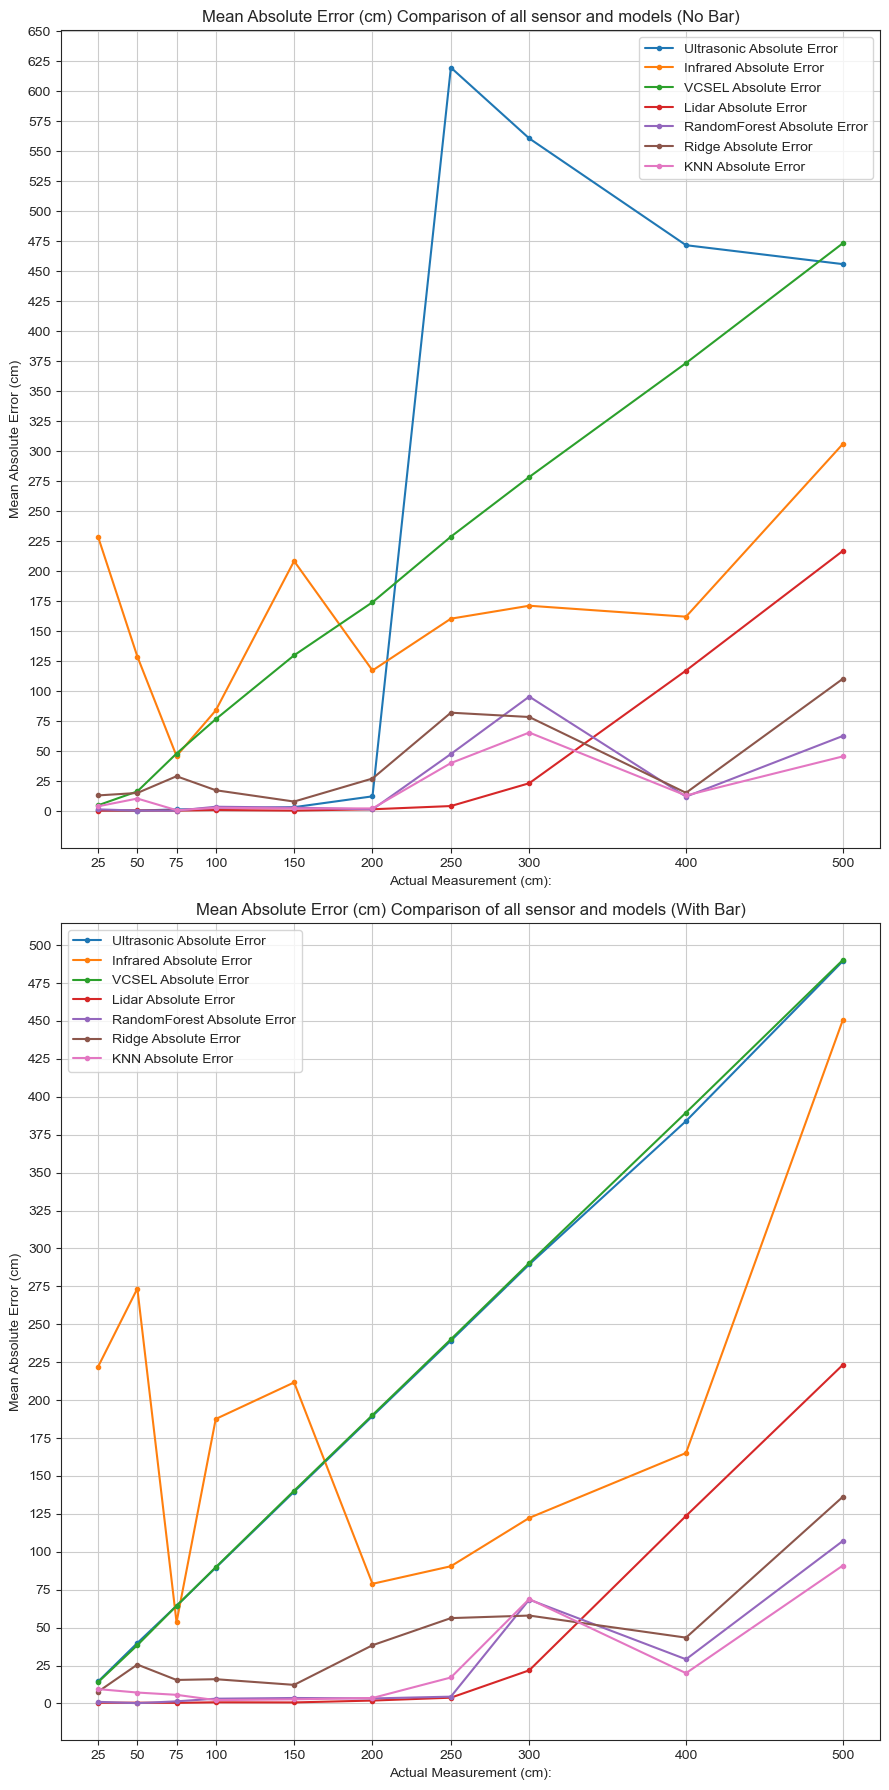

In [53]:
#Create list of column names of sensor and models MAPE
sensor_models_MAE = []
for sensor in sensors + models:
    sensor_models_MAE.append(f"{sensor} {metrics[1]}")

fig, axes = plt.subplots(2, 1, figsize=(9,18))
X_test_grouped = X_testWithConditionsPredictionsActual_aggregate.groupby("Barrier")

for (key, ax) in zip(X_test_grouped.groups.keys(), axes.flatten()):
    X_test_grouped.get_group(key).plot(x="Actual Measurement (cm):", y=sensor_models_MAE, ax=ax, marker=".")
    ax.set_xticks([25, 50, 75, 100, 150, 200, 250, 300, 400, 500])
    ax.set_ylabel("Mean Absolute Error (cm)")
    ax.set_yticks(np.arange(0, ax.get_ylim()[1], 25))
    ax.set_title(f"Mean Absolute Error (cm) Comparison of all sensor and models ({key})")

plt.tight_layout()
plt.savefig(f"MAE All sensors and models", dpi=600)
plt.show()

# Transitioning to Cairo and Creating and Creating Verifiable ML models using GizaTech

Let's explore on recreating a regression model using pytorch library to be compatilbe with GizaTech's transpiler.

In [54]:
from giza_actions.action import Action, action
from giza_actions.task import task

import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class RidgeReg(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RidgeReg, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [55]:
@task(name=f"Split Dataset")
def split_dataset(X, y):
    #stratify the splitting based on the index value of X dataFrame
    X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, stratify=X["index"], random_state=41)

    #We don't need the index column anymore for prediction, since it was only used for stratifying
    #We also drop "Time of Day","Size","Color","Barrier" to avoid the model from learning the actual conditions of the measurement
    X_trainVal.drop(["index","Time of Day","Size","Color","Barrier"], axis=1, inplace=True)
    X_test.drop(["index","Time of Day","Size","Color","Barrier"], axis=1, inplace=True)
    
    
    # Displaying the shapes of the training and testing sets
    print(X_trainVal.shape, X_test.shape, y_trainVal.shape, y_test.shape)
    return X_trainVal, X_test, y_trainVal, y_test

In [56]:
@task(name=f"Filtering Dataset")
def filter_dataset(X_trainVal, X_test, y_trainVal, y_test):
    selectFeatures = SelectFromModel(Lasso(alpha=10))
    selectFeatures.fit(X_trainVal, y_trainVal)
    selectedFeatureNames = X_trainVal.columns[selectFeatures.get_support(indices=True)]
    X_trainVal_filtered = selectFeatures.transform(X_trainVal)
    #X_train_filter is a numpy array, re-assign the column names back
    X_trainVal_filtered = pd.DataFrame(X_trainVal_filtered, columns=selectedFeatureNames, index=X_trainVal.index)

    X_test_filtered = selectFeatures.transform(X_test)
    #X_test_filter is a numpy array, re-assign the column names back
    X_test_filtered = pd.DataFrame(X_test_filtered, columns=selectedFeatureNames, index=X_test.index)
    print("X_train shape before feature selection: {}".format(X_trainVal.shape))
    print("X_train_filtered shape after feature selection: {}".format(X_trainVal_filtered.shape))
    return X_trainVal_filtered, X_test_filtered

In [73]:
@task(name=f"Training Model")
def train_model(model, criterion, optimizer, inputs, labels, num_epochs=200):
    lambda_l2 = 0.01
    # Decrease the learning rate if necessary or make it an adjustable parameter
    # optimizer = optim.SGD(model.parameters(), lr=0.001) # Example adjustment, if not set outside
    
    for epoch in range(num_epochs):  # Number of epochs
        optimizer.zero_grad()  # Zero the gradients
        
        outputs = model(inputs)  # Forward pass: Compute predicted y by passing x to the model
        outputs = torch.nan_to_num(outputs, nan=0.0)  # Convert nan to 0 in outputs to avoid propagation
        
        mse_loss = criterion(outputs, labels)  # Compute MSE loss
        
        l2_regularization = sum(param.pow(2.0).sum() for param in model.parameters())
        loss = mse_loss + lambda_l2 * l2_regularization  # Add L2 regularization term
        
        loss.backward()  # Backward pass: Compute gradient of the loss with respect to model parameters
        
        # Implement gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        
        optimizer.step()  # Perform a single optimization step (parameter update)
        
        # Convert potential 'inf' or very large loss to 'nan' to zero to avoid breaking the training loop
        if torch.isinf(loss) or torch.isnan(loss):
            print(f"Warning: Loss is {loss.item()} at epoch {epoch+1}, adjusting...")
            continue  # Optionally skip steps or adjust learning rate dynamically here
        
        # Print loss every few epochs
        if epoch % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    print("Model trained successfully. ✅")
    return model


C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Training Model' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:1' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(


In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

@task(name=f"Testing Model")
def test_model(model, inputs_test, labels_test):
    """
    Test a regression model using PyTorch and evaluate its performance on a test set.
    
    This function puts the model in evaluation mode, disables gradient calculations,
    makes predictions on the test data, and then computes various performance metrics 
    including R2 score, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), 
    and Mean Squared Error (MSE) to assess the model's accuracy and precision.
    
    Parameters:
    - model (torch.nn.Module): The regression model to be tested.
    - inputs_test (torch.Tensor): The input data for testing the model. It should be a tensor.
    - labels_test (torch.Tensor): The true values for the test data. It should be a tensor.
    
    Returns:
    - A printout of the model's performance metrics: R2 score, MAE, RMSE, and MSE.
    
    The function demonstrates the use of PyTorch for model evaluation in a regression context,
    showcasing how to transition from PyTorch tensors to numpy arrays for the use of sklearn's
    metrics functions.
    """
    print("Testing model...")
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient calculations
    with torch.no_grad():
        outputs_test = model(inputs_test)

    # Convert PyTorch tensors to numpy arrays for scoring
    labels_np = labels_test.numpy()
    outputs_np = outputs_test.numpy()

    # Calculate R2 score, MAE, RMSE, and MSE
    r2 = r2_score(labels_np, outputs_np)
    mae = mean_absolute_error(labels_np, outputs_np)
    mse = mean_squared_error(labels_np, outputs_np)
    rmse = np.sqrt(mse)

    print("✅ Model tested successfully")
    print(f'R2 Score: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MSE: {mse:.4f}')
    return r2, mae, rmse, mse

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Testing Model' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:3' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(


In [74]:
@action(name=f"Execution", log_prints=True)
def execution():
    X = df_sensors.loc[:, df_sensors.columns != "Actual Measurement (cm):"]
    y = df_sensors.loc[:, "Actual Measurement (cm):"]
    X_trainVal, X_test, y_trainVal, y_test = split_dataset(X,y)
    X_trainVal_filtered, X_test_filtered = filter_dataset(X_trainVal, X_test, y_trainVal, y_test)
    input_size = X_trainVal_filtered.shape[1]
    
    # Initialize model, loss, and optimizer
    input_dim = input_size  # input dimension
    output_dim = 1  # output dimension
    model = RidgeReg(input_dim, output_dim)
    criterion = nn.MSELoss()  # Mean Squared Error Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

    # Regularization parameter
    lambda_l2 = 0.01
    
    model = train_model(model, criterion, optimizer, torch.tensor(X_trainVal_filtered.to_numpy(), dtype=torch.float32), torch.tensor(y_trainVal.to_numpy(), dtype=torch.float32).view(-1, 1), 500)
    test_model(model, torch.tensor(X_test_filtered.to_numpy(),dtype=torch.float32), torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1))
    print("Testing Done...")
    return model, input_size
    
    
model,input_size = execution()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:338: UserWarning: A flow named 'Execution' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:1' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


18:07:16.686 | INFO    | Created flow run 'lovely-bullfrog' for flow 'Execution'

18:07:16.692 | INFO    | Action run 'lovely-bullfrog' - View at https://actions-server-channy456-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/c3e4d896-4625-4c09-8dae-906647c74d7c

18:07:17.847 | INFO    | Action run 'lovely-bullfrog' - Created task run 'Split Dataset-0' for task 'Split Dataset'

18:07:17.852 | INFO    | Action run 'lovely-bullfrog' - Executing 'Split Dataset-0' immediately...

18:07:19.047 | INFO    | Task run 'Split Dataset-0' - (600, 16) (200, 16) (600,) (200,)

18:07:19.449 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

18:07:19.835 | INFO    | Action run 'lovely-bullfrog' - Created task run 'Filtering Dataset-0' for task 'Filtering Dataset'

18:07:19.839 | INFO    | Action run 'lovely-bullfrog' - Executing 'Filtering Dataset-0' immediately...

18:07:20.620 | INFO    | Task run 'Filtering Dataset-0' - X_train shape before feature selection: (600, 16)

18:07:20.626 | INFO    | Task run 'Filtering Dataset-0' - X_train_filtered shape after feature selection: (600, 10)

18:07:21.023 | INFO    | Task run 'Filtering Dataset-0' - Finished in state Completed()

18:07:21.420 | INFO    | Action run 'lovely-bullfrog' - Created task run 'Training Model-0' for task 'Training Model'

18:07:21.426 | INFO    | Action run 'lovely-bullfrog' - Executing 'Training Model-0' immediately...

18:07:22.213 | INFO    | Task run 'Training Model-0' - Epoch [1/500], Loss: 20699.4863

18:07:22.236 | INFO    | Task run 'Training Model-0' - Epoch [11/500], Loss: 14310.8311

18:07:22.255 | INFO    | Task run 'Training Model-0' - Epoch [21/500], Loss: 11800.3320

18:07:22.285 | INFO    | Task run 'Training Model-0' - Epoch [31/500], Loss: 9829.1680

18:07:22.304 | INFO    | Task run 'Training Model-0' - Epoch [41/500], Loss: 8165.2271

18:07:22.332 | INFO    | Task run 'Training Model-0' - Epoch [51/500], Loss: 6798.8633

18:07:22.351 | INFO    | Task run 'Training Model-0' - Epoch [61/500], Loss: 5720.3203

18:07:22.374 | INFO    | Task run 'Training Model-0' - Epoch [71/500], Loss: 4913.2051

18:07:22.401 | INFO    | Task run 'Training Model-0' - Epoch [81/500], Loss: 4345.8291

18:07:22.430 | INFO    | Task run 'Training Model-0' - Epoch [91/500], Loss: 3958.5308

18:07:22.455 | INFO    | Task run 'Training Model-0' - Epoch [101/500], Loss: 3675.2922

18:07:22.480 | INFO    | Task run 'Training Model-0' - Epoch [111/500], Loss: 3510.1465

18:07:22.502 | INFO    | Task run 'Training Model-0' - Epoch [121/500], Loss: 3414.0007

18:07:22.529 | INFO    | Task run 'Training Model-0' - Epoch [131/500], Loss: 3338.4050

18:07:22.554 | INFO    | Task run 'Training Model-0' - Epoch [141/500], Loss: 3278.7983

18:07:22.574 | INFO    | Task run 'Training Model-0' - Epoch [151/500], Loss: 3231.7185

18:07:22.599 | INFO    | Task run 'Training Model-0' - Epoch [161/500], Loss: 3194.4731

18:07:22.627 | INFO    | Task run 'Training Model-0' - Epoch [171/500], Loss: 3164.9563

18:07:22.652 | INFO    | Task run 'Training Model-0' - Epoch [181/500], Loss: 3141.5142

18:07:22.674 | INFO    | Task run 'Training Model-0' - Epoch [191/500], Loss: 3122.8516

18:07:22.702 | INFO    | Task run 'Training Model-0' - Epoch [201/500], Loss: 3107.9512

18:07:22.729 | INFO    | Task run 'Training Model-0' - Epoch [211/500], Loss: 3096.0144

18:07:22.749 | INFO    | Task run 'Training Model-0' - Epoch [221/500], Loss: 3086.4128

18:07:22.770 | INFO    | Task run 'Training Model-0' - Epoch [231/500], Loss: 3078.6538

18:07:22.787 | INFO    | Task run 'Training Model-0' - Epoch [241/500], Loss: 3072.3494

18:07:22.816 | INFO    | Task run 'Training Model-0' - Epoch [251/500], Loss: 3067.1963

18:07:22.842 | INFO    | Task run 'Training Model-0' - Epoch [261/500], Loss: 3062.9546

18:07:22.861 | INFO    | Task run 'Training Model-0' - Epoch [271/500], Loss: 3059.4355

18:07:22.878 | INFO    | Task run 'Training Model-0' - Epoch [281/500], Loss: 3056.4912

18:07:22.895 | INFO    | Task run 'Training Model-0' - Epoch [291/500], Loss: 3054.0042

18:07:22.916 | INFO    | Task run 'Training Model-0' - Epoch [301/500], Loss: 3051.8833

18:07:22.937 | INFO    | Task run 'Training Model-0' - Epoch [311/500], Loss: 3050.0559

18:07:22.959 | INFO    | Task run 'Training Model-0' - Epoch [321/500], Loss: 3048.4636

18:07:22.980 | INFO    | Task run 'Training Model-0' - Epoch [331/500], Loss: 3047.0623

18:07:23.000 | INFO    | Task run 'Training Model-0' - Epoch [341/500], Loss: 3045.8167

18:07:23.021 | INFO    | Task run 'Training Model-0' - Epoch [351/500], Loss: 3044.6973

18:07:23.036 | INFO    | Task run 'Training Model-0' - Epoch [361/500], Loss: 3043.6816

18:07:23.052 | INFO    | Task run 'Training Model-0' - Epoch [371/500], Loss: 3042.7522

18:07:23.070 | INFO    | Task run 'Training Model-0' - Epoch [381/500], Loss: 3041.8945

18:07:23.084 | INFO    | Task run 'Training Model-0' - Epoch [391/500], Loss: 3041.0972

18:07:23.098 | INFO    | Task run 'Training Model-0' - Epoch [401/500], Loss: 3040.3523

18:07:23.116 | INFO    | Task run 'Training Model-0' - Epoch [411/500], Loss: 3039.6506

18:07:23.131 | INFO    | Task run 'Training Model-0' - Epoch [421/500], Loss: 3038.9866

18:07:23.147 | INFO    | Task run 'Training Model-0' - Epoch [431/500], Loss: 3038.3562

18:07:23.163 | INFO    | Task run 'Training Model-0' - Epoch [441/500], Loss: 3037.7546

18:07:23.177 | INFO    | Task run 'Training Model-0' - Epoch [451/500], Loss: 3037.1792

18:07:23.195 | INFO    | Task run 'Training Model-0' - Epoch [461/500], Loss: 3036.6267

18:07:23.221 | INFO    | Task run 'Training Model-0' - Epoch [471/500], Loss: 3036.0950

18:07:23.264 | INFO    | Task run 'Training Model-0' - Epoch [481/500], Loss: 3035.5825

18:07:23.286 | INFO    | Task run 'Training Model-0' - Epoch [491/500], Loss: 3035.0872

18:07:23.315 | INFO    | Task run 'Training Model-0' - Model trained successfully. ✅

18:07:23.738 | INFO    | Task run 'Training Model-0' - Finished in state Completed()

18:07:24.124 | INFO    | Action run 'lovely-bullfrog' - Created task run 'Testing Model-0' for task 'Testing Model'

18:07:24.126 | INFO    | Action run 'lovely-bullfrog' - Executing 'Testing Model-0' immediately...

18:07:24.906 | INFO    | Task run 'Testing Model-0' - Testing model...

18:07:24.915 | INFO    | Task run 'Testing Model-0' - ✅ Model tested successfully

18:07:24.919 | INFO    | Task run 'Testing Model-0' - R2 Score: 0.8606

18:07:24.924 | INFO    | Task run 'Testing Model-0' - MAE: 40.2032

18:07:24.928 | INFO    | Task run 'Testing Model-0' - RMSE: 55.8156

18:07:24.932 | INFO    | Task run 'Testing Model-0' - MSE: 3115.3826

18:07:25.342 | INFO    | Task run 'Testing Model-0' - Finished in state Completed()

18:07:25.348 | INFO    | Action run 'lovely-bullfrog' - Testing Done...

18:07:25.751 | INFO    | Action run 'lovely-bullfrog' - Finished in state Completed()

# Convert the Model to ONNX

In [75]:
import torch
import torch.onnx

@action(name="Model Conversion to ONNX")
def onnx_model_conversion():
    # Assuming 'input_size' is the size of model's input
    dummy_input = torch.randn(1, input_size, dtype=torch.float32)

    # Set the model to evaluation mode
    model.eval()

    # Export the model
    torch.onnx.export(model,               # model being run
                      dummy_input,         # model input (or a tuple for multiple inputs)
                      "sensor_fusion_model.onnx",        # where to save the model (can be a file or file-like object)
                      export_params=True,  # store the trained parameter weights inside the model file
                      opset_version=10,    # the ONNX version to export the model to
                      do_constant_folding=True,  # whether to execute constant folding for optimization
                      input_names = ['input'],   # the model's input names
                      output_names = ['output'], # the model's output names
                      dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                    'output' : {0 : 'batch_size'}})
    
onnx_model_conversion()

22:29:18.520 | INFO    | Created flow run 'fearless-chihuahua' for flow 'Model Conversion to ONNX'

22:29:18.536 | INFO    | Action run 'fearless-chihuahua' - View at https://actions-server-channy456-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/8db62385-429e-4d31-ac87-66b1f9d089cc

22:29:20.041 | INFO    | Action run 'fearless-chihuahua' - Finished in state Completed()

In [76]:
import onnx

# Reading the ONNX model from file
loaded_model = onnx.load("sensor_fusion_model.onnx")

# Looping over all nodes within the model graph
for each_node in loaded_model.graph.node:
    print(f"Node Type: {each_node.op_type}")  # Displaying the type of operation for each node
    # Display additional information about each node
    print(f"Node Inputs: {each_node.input}, Node Outputs: {each_node.output}")
    print("===")  # Separator for readability

Node Type: Gemm
Node Inputs: ['input', 'linear.weight', 'linear.bias'], Node Outputs: ['output']
===


## Creating Verifiable Predictions using Giza Model

In [84]:
from giza_actions.model import GizaModel

model_identifier = 287  # Customize with the specific model ID
version_identifier = 1  # Customize with the specific version ID

@task(name='Generate Prediction')
def predict_output(data_for_prediction, model_id, version_id):
    # Initialize the prediction model with the given model and version IDs.
    prediction_model = GizaModel(
        id=model_id,
        version=version_id
    )
    
    # Perform prediction using the model's predict method and ensure output integrity.
    prediction_result, prediction_tracking_id = prediction_model.predict(
        input_feed={"DataForPrediction": data_for_prediction}, 
        verifiable=True
    )
    print(prediction_result)
    print(prediction_tracking_id)
    return prediction_result, prediction_tracking_id

@action(name='Execute Prediction Process', log_prints=True)
def execute_prediction():
    X = df_sensors.loc[:, df_sensors.columns != "Actual Measurement (cm):"]
    y = df_sensors.loc[:, "Actual Measurement (cm):"]
    X_trainVal, X_test, y_trainVal, y_test = split_dataset(X,y)
    X_trainVal_filtered, X_test_filtered = filter_dataset(X_trainVal, X_test, y_trainVal, y_test)
    input_size = X_trainVal_filtered.shape[1]
    single_test_sample = X_test_filtered.to_numpy()[1].reshape(1, -1)
    # Using a single sample from the test set for making a prediction
    prediction_result, operation_tracking_id = predict_output(single_test_sample, model_identifier, version_identifier) 
    return prediction_result, operation_tracking_id

execute_prediction()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Generate Prediction' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:6' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:338: UserWarning: A flow named 'Execute Prediction Process' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:23' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


22:54:29.081 | INFO    | Created flow run 'capable-unicorn' for flow 'Execute Prediction Process'

22:54:29.089 | INFO    | Action run 'capable-unicorn' - View at https://actions-server-channy456-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/c1ad2320-4e8f-4554-8978-c8380b5b8405

22:54:32.051 | INFO    | Action run 'capable-unicorn' - Created task run 'Split Dataset-0' for task 'Split Dataset'

22:54:32.056 | INFO    | Action run 'capable-unicorn' - Executing 'Split Dataset-0' immediately...

22:54:34.102 | INFO    | Task run 'Split Dataset-0' - (600, 16) (200, 16) (600,) (200,)

22:54:34.492 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

22:54:34.842 | INFO    | Action run 'capable-unicorn' - Created task run 'Filtering Dataset-0' for task 'Filtering Dataset'

22:54:34.847 | INFO    | Action run 'capable-unicorn' - Executing 'Filtering Dataset-0' immediately...

22:54:35.576 | INFO    | Task run 'Filtering Dataset-0' - X_train shape before feature selection: (600, 16)

22:54:35.583 | INFO    | Task run 'Filtering Dataset-0' - X_train_filtered shape after feature selection: (600, 10)

22:54:35.978 | INFO    | Task run 'Filtering Dataset-0' - Finished in state Completed()

22:54:36.334 | INFO    | Action run 'capable-unicorn' - Created task run 'Generate Prediction-0' for task 'Generate Prediction'

22:54:36.339 | INFO    | Action run 'capable-unicorn' - Executing 'Generate Prediction-0' immediately...

🚀 Starting deserialization process...
✅ Deserialization completed! 🎉


22:54:42.471 | INFO    | Task run 'Generate Prediction-0' - [[178.22488403]]

22:54:42.477 | INFO    | Task run 'Generate Prediction-0' - "4033a87fb2354c1eac09e933dd89376f"

22:54:42.862 | INFO    | Task run 'Generate Prediction-0' - Finished in state Completed()

22:54:43.225 | INFO    | Action run 'capable-unicorn' - Finished in state Completed()

(array([[178.22488403]]), '"4033a87fb2354c1eac09e933dd89376f"')

In [86]:
import requests
import json
from giza import API_HOST

# Update the following variables with your specific details
MODEL_ID = 287  # Update with your model ID
VERSION_ID = 1  # Update with your version ID
DEPLOYMENT_ID = 17
REQUEST_ID = "4033a87fb2354c1eac09e933dd89376f"
json_file_path = r"C:\Users\Predator\.giza\.api_key.json"
with open(json_file_path, 'r') as file:
    data = json.load(file)
API_KEY = data['api_key'] ##needed to be masked when uploaded to a github repo

url = f'{API_HOST}/api/v1/models/{MODEL_ID}/versions/{VERSION_ID}/deployments/{DEPLOYMENT_ID}/proofs/{REQUEST_ID}:download'
headers = {"X-API-KEY": API_KEY}
d_url = requests.get(url, headers=headers).json()["download_url"]
proof = requests.get(d_url)

with open("sensor_fusion_zk.proof", "wb") as f:
     f.write(proof.content)